In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
import xgboost as xgb
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading the data into a DataFrame
df = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\dataset_on_digital_transaction.csv')

In [3]:
print(df.head())

   Sr_No Application Name Customer Initiated Transactions in Volume (Mn)  \
0  52001          PhonePe                                       6,502.15   
1  52002       Google Pay                                       5,061.18   
2  52003            Paytm                                       1,210.64   
3  52004             Cred                                         132.31   
4  52005   Axis Bank Apps                                          13.59   

  Customer Initiated Transactions in Value (Cr)  \
0                                  10,02,387.84   
1                                   6,95,196.05   
2                                   1,33,707.06   
3                                     44,991.57   
4                                      3,044.92   

   B2C Transactions in Volume (Mn) B2C Transactions in Value (Cr)  \
0                              0.0                              0   
1                              0.0                              0   
2                            

In [4]:
print(df.dtypes)

Sr_No                                               int64
Application Name                                   object
Customer Initiated Transactions in Volume (Mn)     object
Customer Initiated Transactions in Value (Cr)      object
B2C Transactions in Volume (Mn)                   float64
B2C Transactions in Value (Cr)                     object
B2B Transactions in Volume (Mn)                   float64
B2B Transactions in Value (Cr)                     object
On-us Transactions in Volume (Mn)                 float64
On-us Transactions in Value (Cr)                   object
Total in Volume (Mn)                               object
Total in Value (Cr)                                object
Date                                               object
dtype: object


In [5]:


# Convert specific columns to float
columns_to_float = [
    'Customer Initiated Transactions in Volume (Mn)',
    'Customer Initiated Transactions in Value (Cr)',
    'B2C Transactions in Value (Cr)',
    'B2B Transactions in Value (Cr)',
    'On-us Transactions in Value (Cr)',
    'Total in Volume (Mn)',
    'Total in Value (Cr)'
]


# Remove commas and convert to float
    
for col in columns_to_float:
    df[col] = df[col].str.replace(',', '').astype(float)


In [6]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [7]:
print(df.isnull().sum())

Sr.No.                                            0
Application Name                                  0
Customer Initiated Transactions in Volume (Mn)    0
Customer Initiated Transactions in Value (Cr)     0
B2C Transactions in Volume (Mn)                   0
B2C Transactions in Value (Cr)                    0
B2B Transactions in Volume (Mn)                   0
B2B Transactions in Value (Cr)                    0
On-us Transactions in Volume (Mn)                 0
On-us Transactions in Value (Cr)                  0
Total in Volume (Mn)                              0
Total in Value (Cr)                               0
Date                                              0
dtype: int64


In [8]:
print(df.describe())

             Sr.No.  Customer Initiated Transactions in Volume (Mn)  \
count   2318.000000                                     2318.000000   
mean   52058.327006                                      111.781855   
std       47.220354                                      585.359901   
min    52001.000000                                        0.000000   
25%    52019.000000                                        0.070000   
50%    52046.000000                                        0.400000   
75%    52086.000000                                        4.347500   
max    52167.000000                                     6502.150000   

       Customer Initiated Transactions in Value (Cr)  \
count                                   2.318000e+03   
mean                                    1.819674e+04   
std                                     9.379974e+04   
min                                     3.000000e-02   
25%                                     1.726000e+01   
50%                     

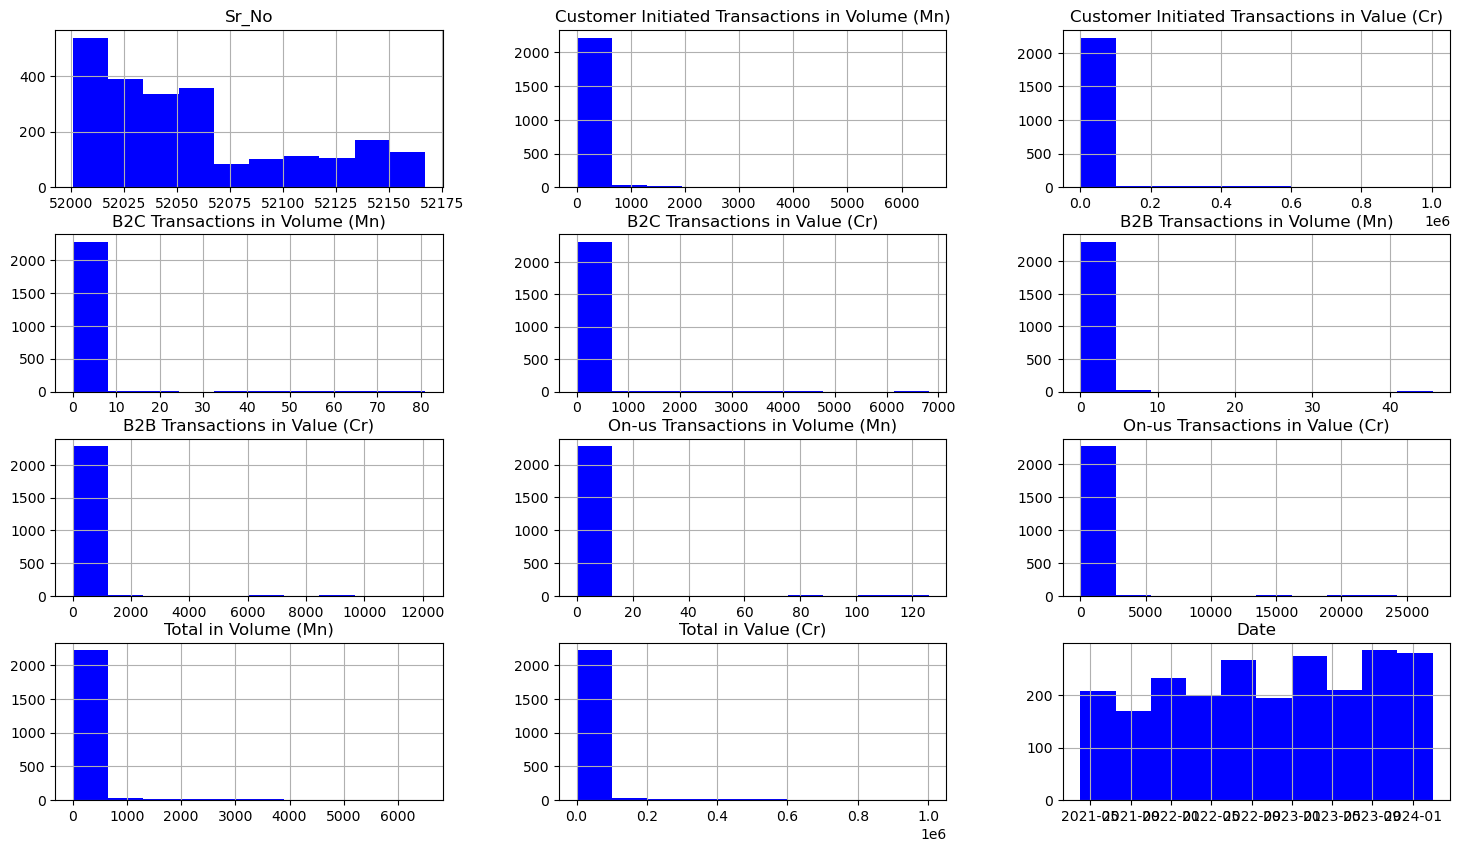

In [7]:
df.hist(figsize=(18, 10), color='blue')
plt.show()

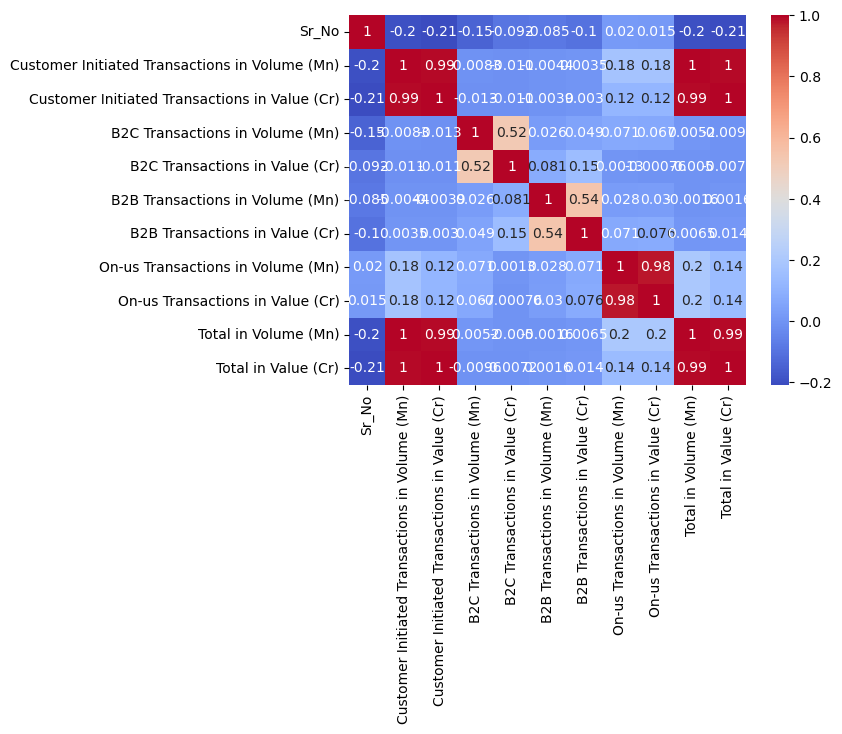

In [8]:
#Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

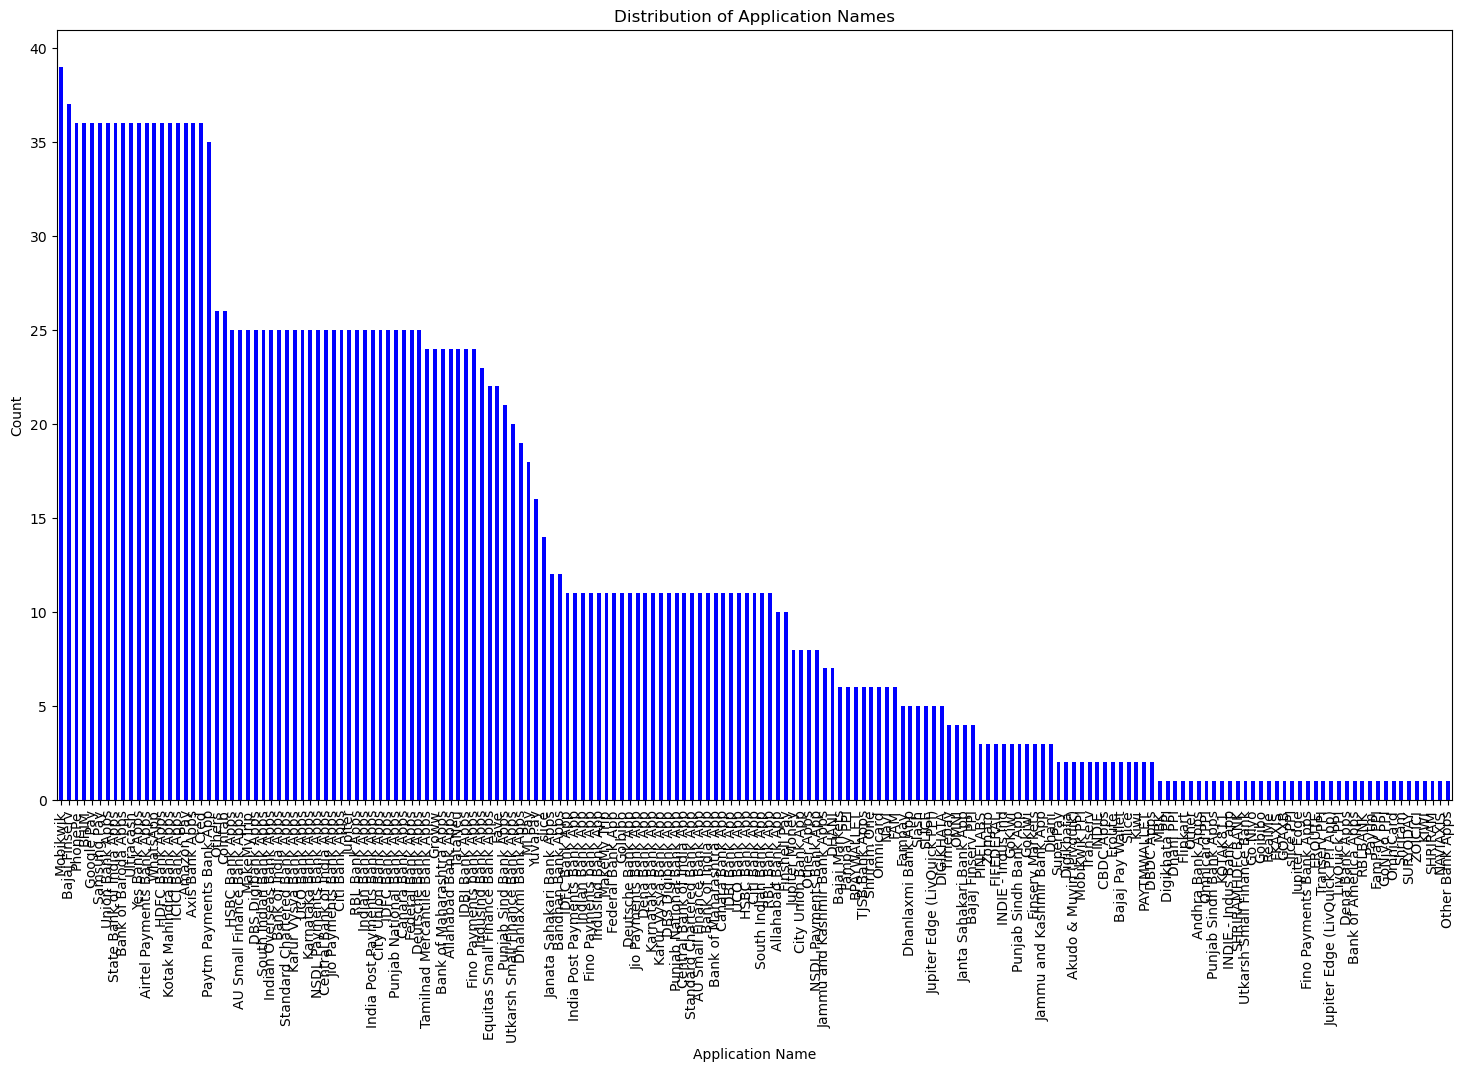

In [9]:
# Plotting bar plots for categorical columns
# For example, if 'Application Name' is a categorical column
plt.figure(figsize=(18, 10))
df['Application Name'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Application Name')
plt.ylabel('Count')
plt.title('Distribution of Application Names')
plt.show()

In [10]:
# Calculate total volume and total value for each application
apps_totals = df.groupby('Application Name').agg({'Total in Volume (Mn)': 'sum', 'Total in Value (Cr)': 'sum'})

In [11]:
# Sort the applications based on total volume and total value
top_apps_by_volume = apps_totals.sort_values(by='Total in Volume (Mn)', ascending=False).head(10)
top_apps_by_value = apps_totals.sort_values(by='Total in Value (Cr)', ascending=False).head(10)

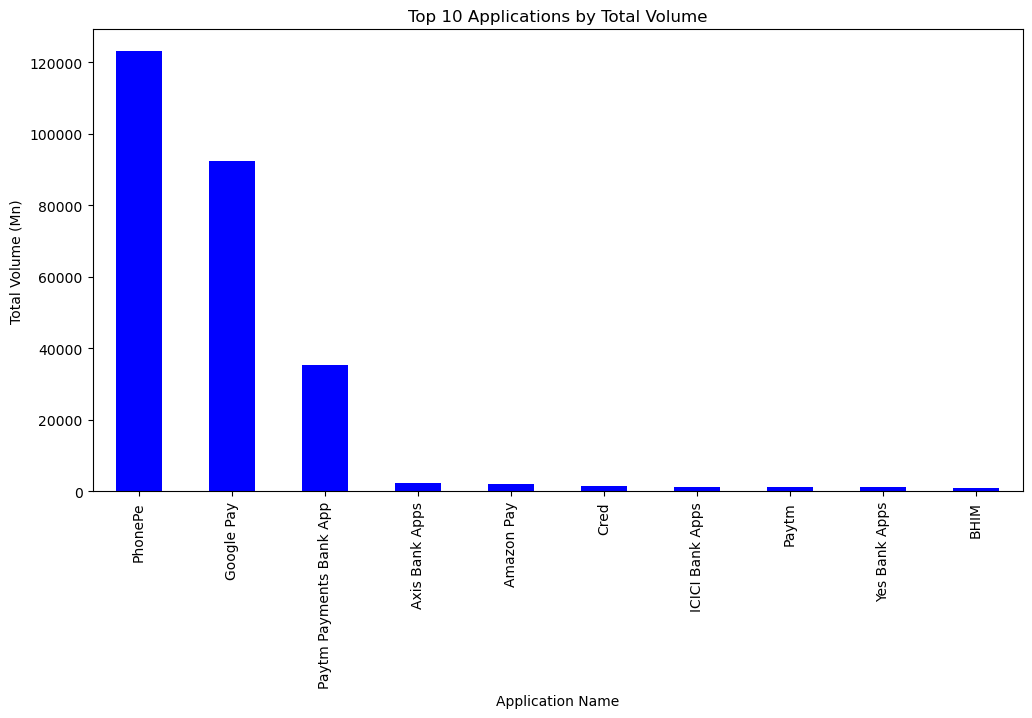

In [12]:
# Plot top 10 applications by total volume
plt.figure(figsize=(12, 6))
top_apps_by_volume['Total in Volume (Mn)'].plot(kind='bar',color='blue')
plt.xlabel('Application Name')
plt.ylabel('Total Volume (Mn)')
plt.title('Top 10 Applications by Total Volume')
plt.show()

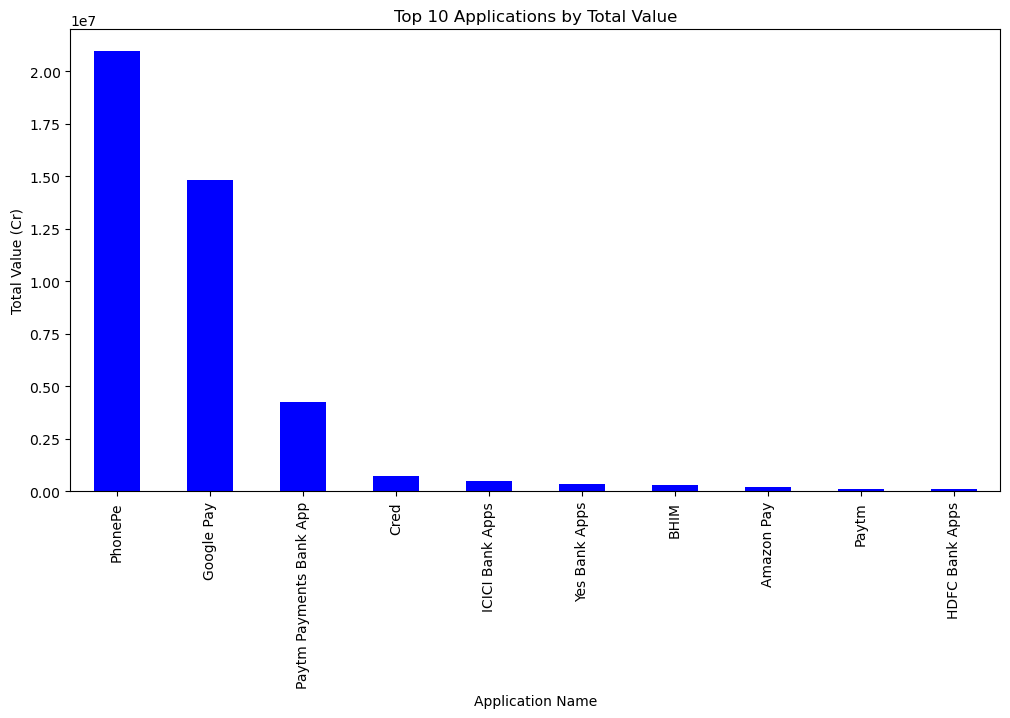

In [13]:
# Plot top 10 applications by total value
plt.figure(figsize=(12, 6))
top_apps_by_value['Total in Value (Cr)'].plot(kind='bar',color='blue')
plt.xlabel('Application Name')
plt.ylabel('Total Value (Cr)')
plt.title('Top 10 Applications by Total Value')
plt.show()

In [14]:
# Filter data for Google Pay
googlepay_data = df[df['Application Name'] == 'Google Pay']

In [15]:
# Calculate total volume and total value
total_vol_gpay = googlepay_data['Total in Volume (Mn)'].sum()
total_value_gpay = googlepay_data['Total in Value (Cr)'].sum()

In [16]:
#Print the total volume and value for the data

print("Total Volume for Google Pay:", total_vol_gpay)
print("Total Value for Google Pay:", total_value_gpay)

Total Volume for Google Pay: 92303.98000000001
Total Value for Google Pay: 14811004.579999998


In [17]:
# Group by month and calculate total volume and total value for each month
googlepay_monthly = googlepay_data.groupby(pd.Grouper(key='Date', freq='M')).agg(
    {'Total in Volume (Mn)': 'sum',
     'Total in Value (Cr)': 'sum'}
)

In [18]:
#Print the value in month wise data for google pay
print(googlepay_monthly)

            Total in Volume (Mn)  Total in Value (Cr)
Date                                                 
2021-04-30                905.96            190106.71
2021-05-31                880.59            187136.95
2021-06-30                972.26            207287.73
2021-07-31               1119.16            230847.54
2021-08-31               1243.75            244453.05
2021-09-30               1294.56            250393.65
2021-10-31               1451.93            287491.46
2021-11-30               1447.84            283357.99
2021-12-31               1587.43            302989.79
2022-01-31               1584.20            298267.07
2022-02-28               1524.09            291273.46
2022-03-31               1838.12            338873.25
2022-04-30               1914.77            344791.35
2022-05-31               2079.92            365989.27
2022-06-30               2025.89            355137.20
2022-07-31               2130.63            366669.09
2022-08-31               221

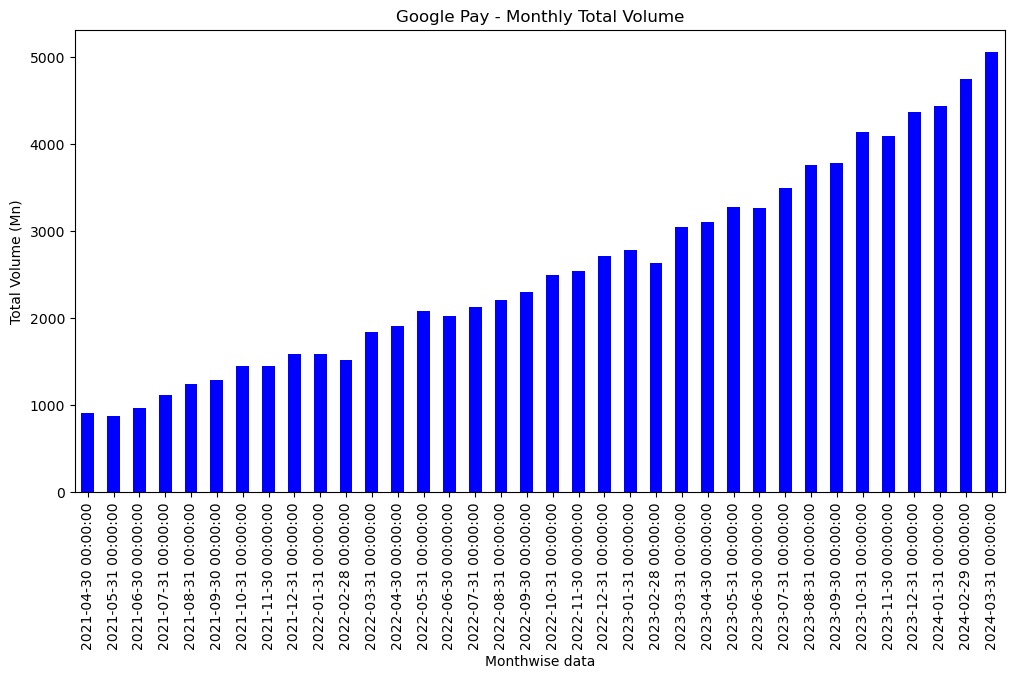

In [19]:
# Plot Google pay by total volume
plt.figure(figsize=(12, 6))
googlepay_monthly['Total in Volume (Mn)'].plot(kind='bar',color='blue')
plt.xlabel('Monthwise data')
plt.ylabel('Total Volume (Mn)')
plt.title('Google Pay - Monthly Total Volume')
plt.show()

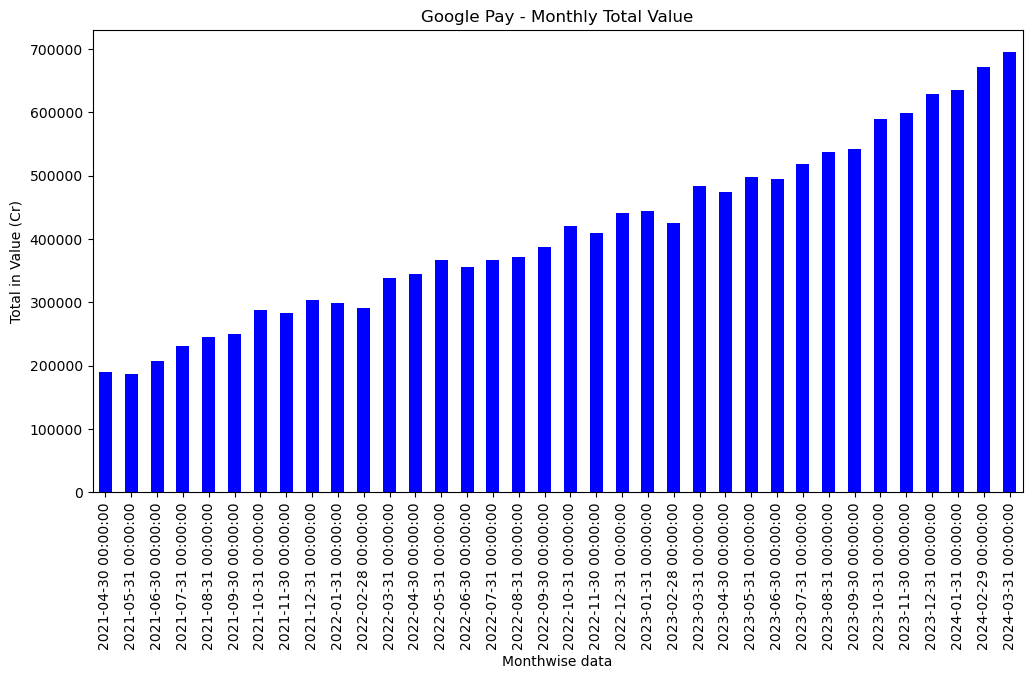

In [20]:
# Plot Google pay by total value
plt.figure(figsize=(12, 6))
googlepay_monthly['Total in Value (Cr)'].plot(kind='bar',color='blue')
plt.xlabel('Monthwise data')
plt.ylabel('Total in Value (Cr)')
plt.title('Google Pay - Monthly Total Value')
plt.show()

In [21]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by both 'Date' and 'Application Name', and sum up the volume
monthly_app_volume = df.groupby([pd.Grouper(key='Date', freq='M'), 'Application Name'])['Total in Volume (Mn)'].sum()

# Reset index to make the DataFrame tidy
monthly_app_volume = monthly_app_volume.reset_index()

In [22]:
#Print the data of all apps in volume
print(monthly_app_volume)

           Date           Application Name  Total in Volume (Mn)
0    2021-04-30  AU Small Finance Bank App                  0.04
1    2021-04-30  Airtel Payments Bank Apps                 14.70
2    2021-04-30         Allahabad Bank App                  0.02
3    2021-04-30                 Amazon Pay                 49.12
4    2021-04-30             Axis Bank Apps                 80.52
...         ...                        ...                   ...
2309 2024-03-31              UCO Bank Apps                  0.18
2310 2024-03-31                  Ultracash                  0.09
2311 2024-03-31            Union Bank Apps                  1.35
2312 2024-03-31                   WhatsApp                 31.21
2313 2024-03-31              Yes Bank Apps                 24.45

[2314 rows x 3 columns]


In [23]:
# Filter the DataFrame for the PhonePe application
phonepe_data = monthly_app_volume[monthly_app_volume['Application Name'] == 'PhonePe']

# Sort the data by date
phonepe_data = phonepe_data.sort_values(by='Date')

# Reset index to remove the serial number
phonepe_data = phonepe_data.reset_index(drop=True)

print(phonepe_data)

         Date Application Name  Total in Volume (Mn)
0  2021-04-30          PhonePe               1189.89
1  2021-05-31          PhonePe               1149.84
2  2021-06-30          PhonePe               1292.71
3  2021-07-31          PhonePe               1492.09
4  2021-08-31          PhonePe               1622.95
5  2021-09-30          PhonePe               1653.19
6  2021-10-31          PhonePe               1937.57
7  2021-11-30          PhonePe               1911.21
8  2021-12-31          PhonePe               2077.60
9  2022-01-31          PhonePe               2140.28
10 2022-02-28          PhonePe               2120.20
11 2022-03-31          PhonePe               2527.15
12 2022-04-30          PhonePe               2616.26
13 2022-05-31          PhonePe               2778.75
14 2022-06-30          PhonePe               2732.59
15 2022-07-31          PhonePe               2993.83
16 2022-08-31          PhonePe               3146.71
17 2022-09-30          PhonePe               3

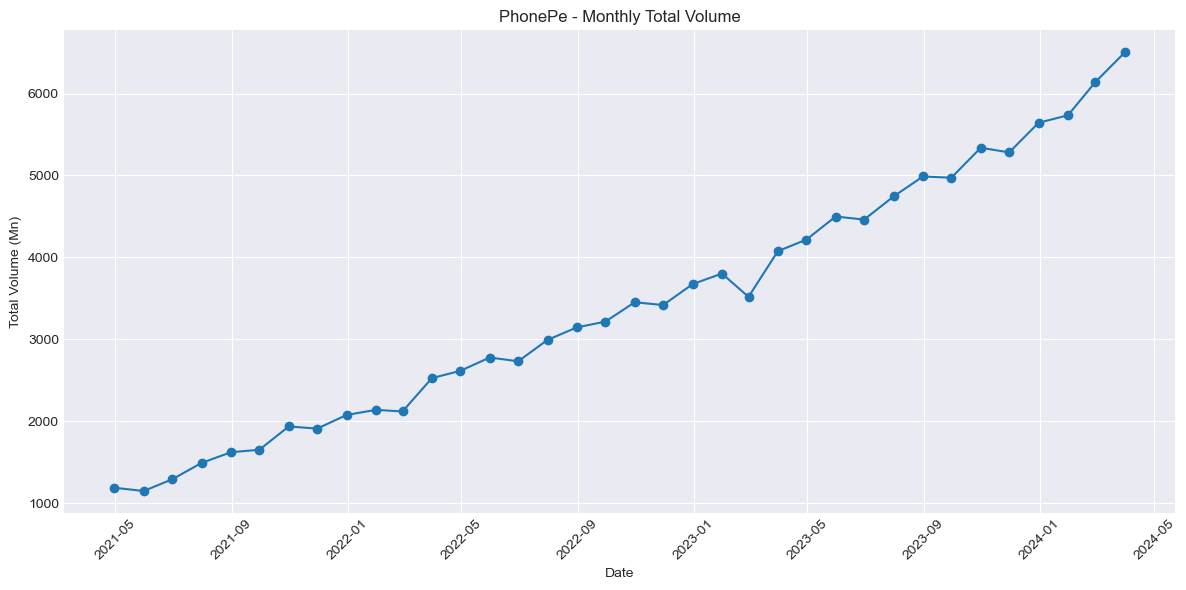

In [24]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Plot lines with points
plt.figure(figsize=(12, 6))
plt.plot(phonepe_data['Date'], phonepe_data['Total in Volume (Mn)'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Volume (Mn)')
plt.title('PhonePe - Monthly Total Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [25]:
# Convert 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])

# Group by both 'Date' and 'Application Name', and sum up the volume
monthly_app_value = df.groupby([pd.Grouper(key='Date', freq='M'), 'Application Name'])['Total in Value (Cr)'].sum()

# Reset index to make the DataFrame tidy
monthly_app_value = monthly_app_value.reset_index()

In [26]:
#Print the data of all apps in value
print(monthly_app_value)

           Date           Application Name  Total in Value (Cr)
0    2021-04-30  AU Small Finance Bank App                20.23
1    2021-04-30  Airtel Payments Bank Apps             11172.43
2    2021-04-30         Allahabad Bank App                 5.21
3    2021-04-30                 Amazon Pay              4272.47
4    2021-04-30             Axis Bank Apps               747.46
...         ...                        ...                  ...
2309 2024-03-31              UCO Bank Apps                56.32
2310 2024-03-31                  Ultracash                 6.57
2311 2024-03-31            Union Bank Apps               517.16
2312 2024-03-31                   WhatsApp              2536.99
2313 2024-03-31              Yes Bank Apps             13869.10

[2314 rows x 3 columns]


In [27]:
# Filter the DataFrame for the PhonePe application
phonepe_data = monthly_app_value[monthly_app_value['Application Name'] == 'PhonePe']

# Sort the data by date
phonepe_data = phonepe_data.sort_values(by='Date')

# Reset index to remove the serial number
phonepe_data = phonepe_data.reset_index(drop=True)

print(phonepe_data)

         Date Application Name  Total in Value (Cr)
0  2021-04-30          PhonePe            234023.33
1  2021-05-31          PhonePe            234123.57
2  2021-06-30          PhonePe            262565.88
3  2021-07-31          PhonePe            288572.90
4  2021-08-31          PhonePe            301644.80
5  2021-09-30          PhonePe            306437.37
6  2021-10-31          PhonePe            365845.39
7  2021-11-30          PhonePe            365044.32
8  2021-12-31          PhonePe            394565.58
9  2022-01-31          PhonePe            405173.78
10 2022-02-28          PhonePe            407640.11
11 2022-03-31          PhonePe            471401.26
12 2022-04-30          PhonePe            486557.03
13 2022-05-31          PhonePe            511028.81
14 2022-06-30          PhonePe            501474.48
15 2022-07-31          PhonePe            524742.49
16 2022-08-31          PhonePe            528433.49
17 2022-09-30          PhonePe            549583.77
18 2022-10-3

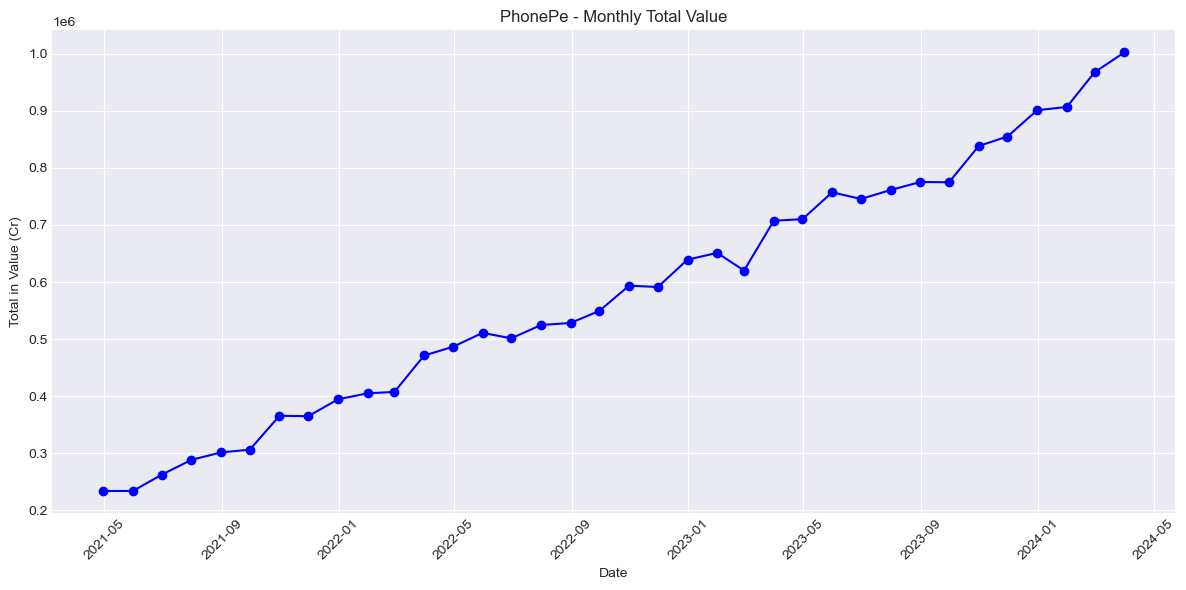

In [28]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Plot lines with points
plt.figure(figsize=(12, 6))
plt.plot(phonepe_data['Date'], phonepe_data['Total in Value (Cr)'], marker='o', linestyle='-',color='blue')
plt.xlabel('Date')
plt.ylabel('Total in Value (Cr)')
plt.title('PhonePe - Monthly Total Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Transaction Density: Dividing total transaction volume by the number of days in a month to get transaction density, indicating the average volume of transactions per day.

In [29]:

# Select the application you want to calculate transaction density for
selected_application = "PhonePe"

# Filter the DataFrame for the selected application
selected_df = df[df['Application Name'] == selected_application]

# Calculate transaction density
days_in_month = selected_df['Date'].dt.days_in_month
selected_df['Transaction Density'] = selected_df['Total in Volume (Mn)'] / days_in_month

# Print the transaction density for the selected application
print(f"Transaction Density for {selected_application}:")
print(selected_df[['Date', 'Transaction Density']])

Transaction Density for PhonePe:
           Date  Transaction Density
0    2024-03-01           209.746774
66   2024-02-01           211.757586
138  2024-01-01           184.985161
209  2023-12-01           182.021290
280  2023-11-01           176.056000
400  2023-10-01           172.192258
420  2023-09-01           165.760333
492  2023-08-01           160.881613
565  2023-07-01           153.021290
635  2023-06-01           148.712000
754  2023-05-01           145.135484
824  2023-04-01           140.566333
895  2023-03-01           131.494194
961  2023-02-01           125.682857
1029 2023-01-01           122.666774
1095 2022-12-01           118.523871
1161 2022-11-01           113.958333
1226 2022-10-01           111.382903
1292 2022-09-01           107.226000
1358 2022-08-01           101.506774
1424 2022-07-01            96.575161
1492 2022-06-01            91.086333
1559 2022-05-01            89.637097
1624 2022-04-01            87.208667
1692 2022-03-01            81.520968
1753 

C:\Users\bharg\AppData\Local\Temp\ipykernel_23560\3003900795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Transaction Density'] = selected_df['Total in Volume (Mn)'] / days_in_month


In [31]:
# Reset index to remove the serial number
phonepe_data_density = selected_df[['Date', 'Transaction Density']].reset_index(drop=True)

print(phonepe_data_density)

         Date  Transaction Density
0  2024-03-01           209.746774
1  2024-02-01           211.757586
2  2024-01-01           184.985161
3  2023-12-01           182.021290
4  2023-11-01           176.056000
5  2023-10-01           172.192258
6  2023-09-01           165.760333
7  2023-08-01           160.881613
8  2023-07-01           153.021290
9  2023-06-01           148.712000
10 2023-05-01           145.135484
11 2023-04-01           140.566333
12 2023-03-01           131.494194
13 2023-02-01           125.682857
14 2023-01-01           122.666774
15 2022-12-01           118.523871
16 2022-11-01           113.958333
17 2022-10-01           111.382903
18 2022-09-01           107.226000
19 2022-08-01           101.506774
20 2022-07-01            96.575161
21 2022-06-01            91.086333
22 2022-05-01            89.637097
23 2022-04-01            87.208667
24 2022-03-01            81.520968
25 2022-02-01            75.721429
26 2022-01-01            69.041290
27 2021-12-01       

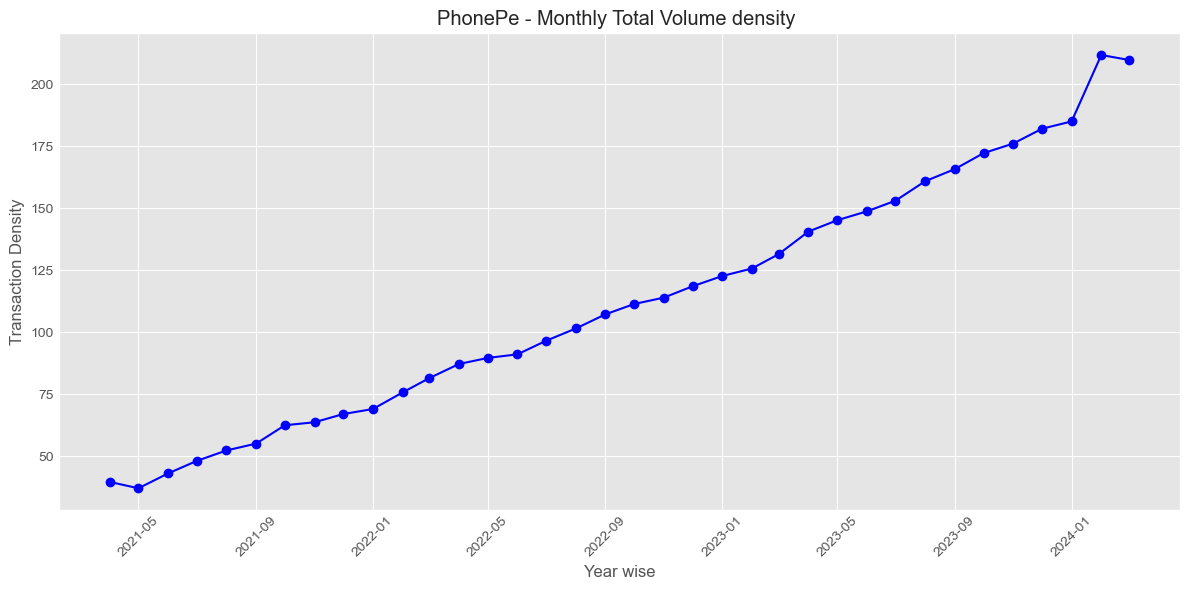

In [32]:
# Set the style
plt.style.use('ggplot')

# Plot lines with points
plt.figure(figsize=(12, 6))
plt.plot(phonepe_data_density['Date'], phonepe_data_density['Transaction Density'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year wise')
plt.ylabel('Transaction Density')
plt.title('PhonePe - Monthly Total Volume density ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [33]:

# Select the application you want to calculate transaction density for
selected_application = "PhonePe"

# Filter the DataFrame for the selected application
selected_df = df[df['Application Name'] == selected_application]

# Calculate transaction density
days_in_month = selected_df['Date'].dt.days_in_month
selected_df['Transaction Density'] = selected_df['Total in Volume (Mn)'] / days_in_month

# Print the transaction density for the selected application
print(f"Transaction Density for {selected_application}:")
print(selected_df[['Date', 'Transaction Density']])

Transaction Density for PhonePe:
           Date  Transaction Density
0    2024-03-01           209.746774
66   2024-02-01           211.757586
138  2024-01-01           184.985161
209  2023-12-01           182.021290
280  2023-11-01           176.056000
400  2023-10-01           172.192258
420  2023-09-01           165.760333
492  2023-08-01           160.881613
565  2023-07-01           153.021290
635  2023-06-01           148.712000
754  2023-05-01           145.135484
824  2023-04-01           140.566333
895  2023-03-01           131.494194
961  2023-02-01           125.682857
1029 2023-01-01           122.666774
1095 2022-12-01           118.523871
1161 2022-11-01           113.958333
1226 2022-10-01           111.382903
1292 2022-09-01           107.226000
1358 2022-08-01           101.506774
1424 2022-07-01            96.575161
1492 2022-06-01            91.086333
1559 2022-05-01            89.637097
1624 2022-04-01            87.208667
1692 2022-03-01            81.520968
1753 

C:\Users\bharg\AppData\Local\Temp\ipykernel_23560\3003900795.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Transaction Density'] = selected_df['Total in Volume (Mn)'] / days_in_month


In [34]:

# Select the application you want to calculate transaction density for
selected_application = "PhonePe"

# Filter the DataFrame for the selected application
selected_df = df[df['Application Name'] == selected_application]

# Calculate transaction density
days_in_month = selected_df['Date'].dt.days_in_month
selected_df['Transaction Density per Value'] = selected_df['Total in Value (Cr)'] / days_in_month

# Print the transaction density for the selected application
print(f"Transaction Density per Value for {selected_application}:")
print(selected_df[['Date', 'Transaction Density per Value']])

Transaction Density per Value for PhonePe:
           Date  Transaction Density per Value
0    2024-03-01                   32335.091613
66   2024-02-01                   33360.937241
138  2024-01-01                   29251.411613
209  2023-12-01                   29064.730645
280  2023-11-01                   28497.968667
400  2023-10-01                   27044.248387
420  2023-09-01                   25828.199333
492  2023-08-01                   25008.566774
565  2023-07-01                   24556.382903
635  2023-06-01                   24851.740000
754  2023-05-01                   24428.280000
824  2023-04-01                   23672.614667
895  2023-03-01                   22819.692581
961  2023-02-01                   22147.213214
1029 2023-01-01                   21003.500323
1095 2022-12-01                   20624.154194
1161 2022-11-01                   19710.920333
1226 2022-10-01                   19153.516774
1292 2022-09-01                   18319.459000
1358 2022-08-01  

C:\Users\bharg\AppData\Local\Temp\ipykernel_23560\1572276598.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Transaction Density per Value'] = selected_df['Total in Value (Cr)'] / days_in_month


In [35]:
# Reset index to remove the serial number
phonepe_data_density = selected_df[['Date', 'Transaction Density per Value']].reset_index(drop=True)

print(phonepe_data_density)

         Date  Transaction Density per Value
0  2024-03-01                   32335.091613
1  2024-02-01                   33360.937241
2  2024-01-01                   29251.411613
3  2023-12-01                   29064.730645
4  2023-11-01                   28497.968667
5  2023-10-01                   27044.248387
6  2023-09-01                   25828.199333
7  2023-08-01                   25008.566774
8  2023-07-01                   24556.382903
9  2023-06-01                   24851.740000
10 2023-05-01                   24428.280000
11 2023-04-01                   23672.614667
12 2023-03-01                   22819.692581
13 2023-02-01                   22147.213214
14 2023-01-01                   21003.500323
15 2022-12-01                   20624.154194
16 2022-11-01                   19710.920333
17 2022-10-01                   19153.516774
18 2022-09-01                   18319.459000
19 2022-08-01                   17046.241613
20 2022-07-01                   16927.177097
21 2022-06

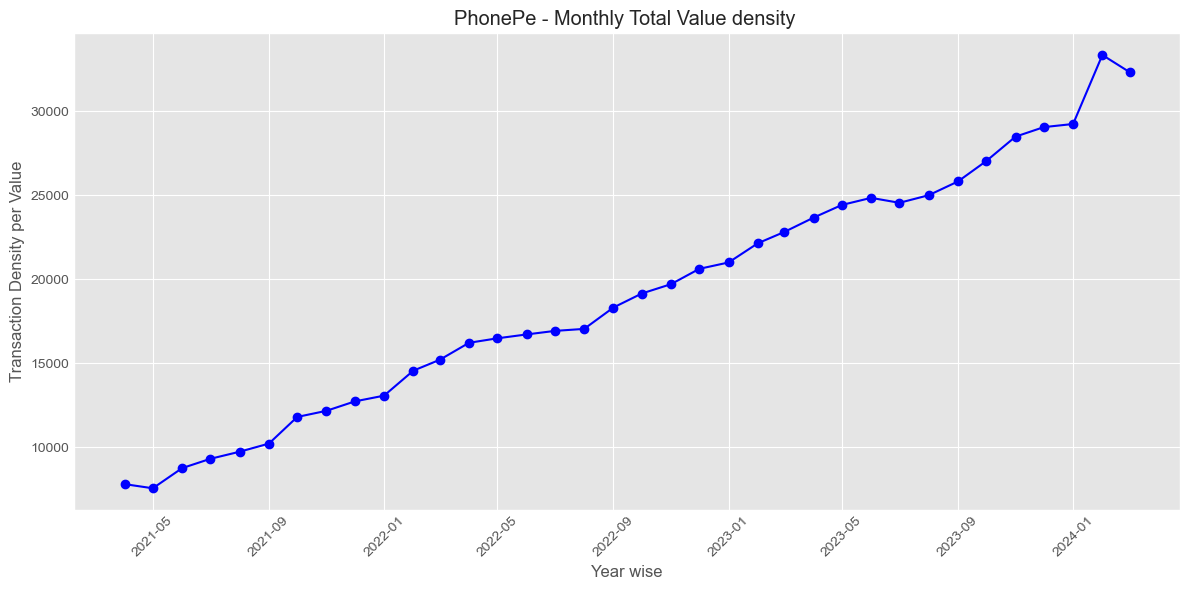

In [36]:
# Set the style
plt.style.use('ggplot')

# Plot lines with points
plt.figure(figsize=(12, 6))
plt.plot(phonepe_data_density['Date'], phonepe_data_density['Transaction Density per Value'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year wise')
plt.ylabel('Transaction Density per Value')
plt.title('PhonePe - Monthly Total Value density ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Transaction Value: Calculating the average transaction value per transaction volume offers insights into the typical size of transactions.

In [37]:
# Filter the DataFrame for Google Pay transactions
google_pay_data = df[df['Application Name'] == 'Google Pay']

# Calculate the transaction value per transaction volume for Google Pay
google_pay_data['Value per Volume'] = google_pay_data['Total in Value (Cr)'] / google_pay_data['Total in Volume (Mn)']

# Display the result
print(google_pay_data[['Date', 'Total in Value (Cr)', 'Total in Volume (Mn)', 'Value per Volume']])

           Date  Total in Value (Cr)  Total in Volume (Mn)  Value per Volume
1    2024-03-01            695196.05               5061.18        137.358491
67   2024-02-01            671539.96               4755.40        141.216293
139  2024-01-01            635945.58               4442.86        143.138784
210  2023-12-01            629285.36               4375.29        143.827120
281  2023-11-01            599748.64               4099.08        146.312987
376  2023-10-01            589299.18               4139.92        142.345548
421  2023-09-01            541624.06               3780.89        143.253059
493  2023-08-01            538113.42               3767.68        142.823547
566  2023-07-01            518095.10               3494.64        148.254212
636  2023-06-01            494088.00               3266.83        151.243866
731  2023-05-01            497748.17               3274.69        151.998562
802  2023-04-01            474049.90               3109.24        152.464879

C:\Users\bharg\AppData\Local\Temp\ipykernel_23560\3261998816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_pay_data['Value per Volume'] = google_pay_data['Total in Value (Cr)'] / google_pay_data['Total in Volume (Mn)']


In [39]:
# Reset index to remove the serial number
Transaction_Value = google_pay_data[['Date', 'Total in Value (Cr)', 'Total in Volume (Mn)', 'Value per Volume']].reset_index(drop=True)

print(Transaction_Value)

         Date  Total in Value (Cr)  Total in Volume (Mn)  Value per Volume
0  2024-03-01            695196.05               5061.18        137.358491
1  2024-02-01            671539.96               4755.40        141.216293
2  2024-01-01            635945.58               4442.86        143.138784
3  2023-12-01            629285.36               4375.29        143.827120
4  2023-11-01            599748.64               4099.08        146.312987
5  2023-10-01            589299.18               4139.92        142.345548
6  2023-09-01            541624.06               3780.89        143.253059
7  2023-08-01            538113.42               3767.68        142.823547
8  2023-07-01            518095.10               3494.64        148.254212
9  2023-06-01            494088.00               3266.83        151.243866
10 2023-05-01            497748.17               3274.69        151.998562
11 2023-04-01            474049.90               3109.24        152.464879
12 2023-03-01            

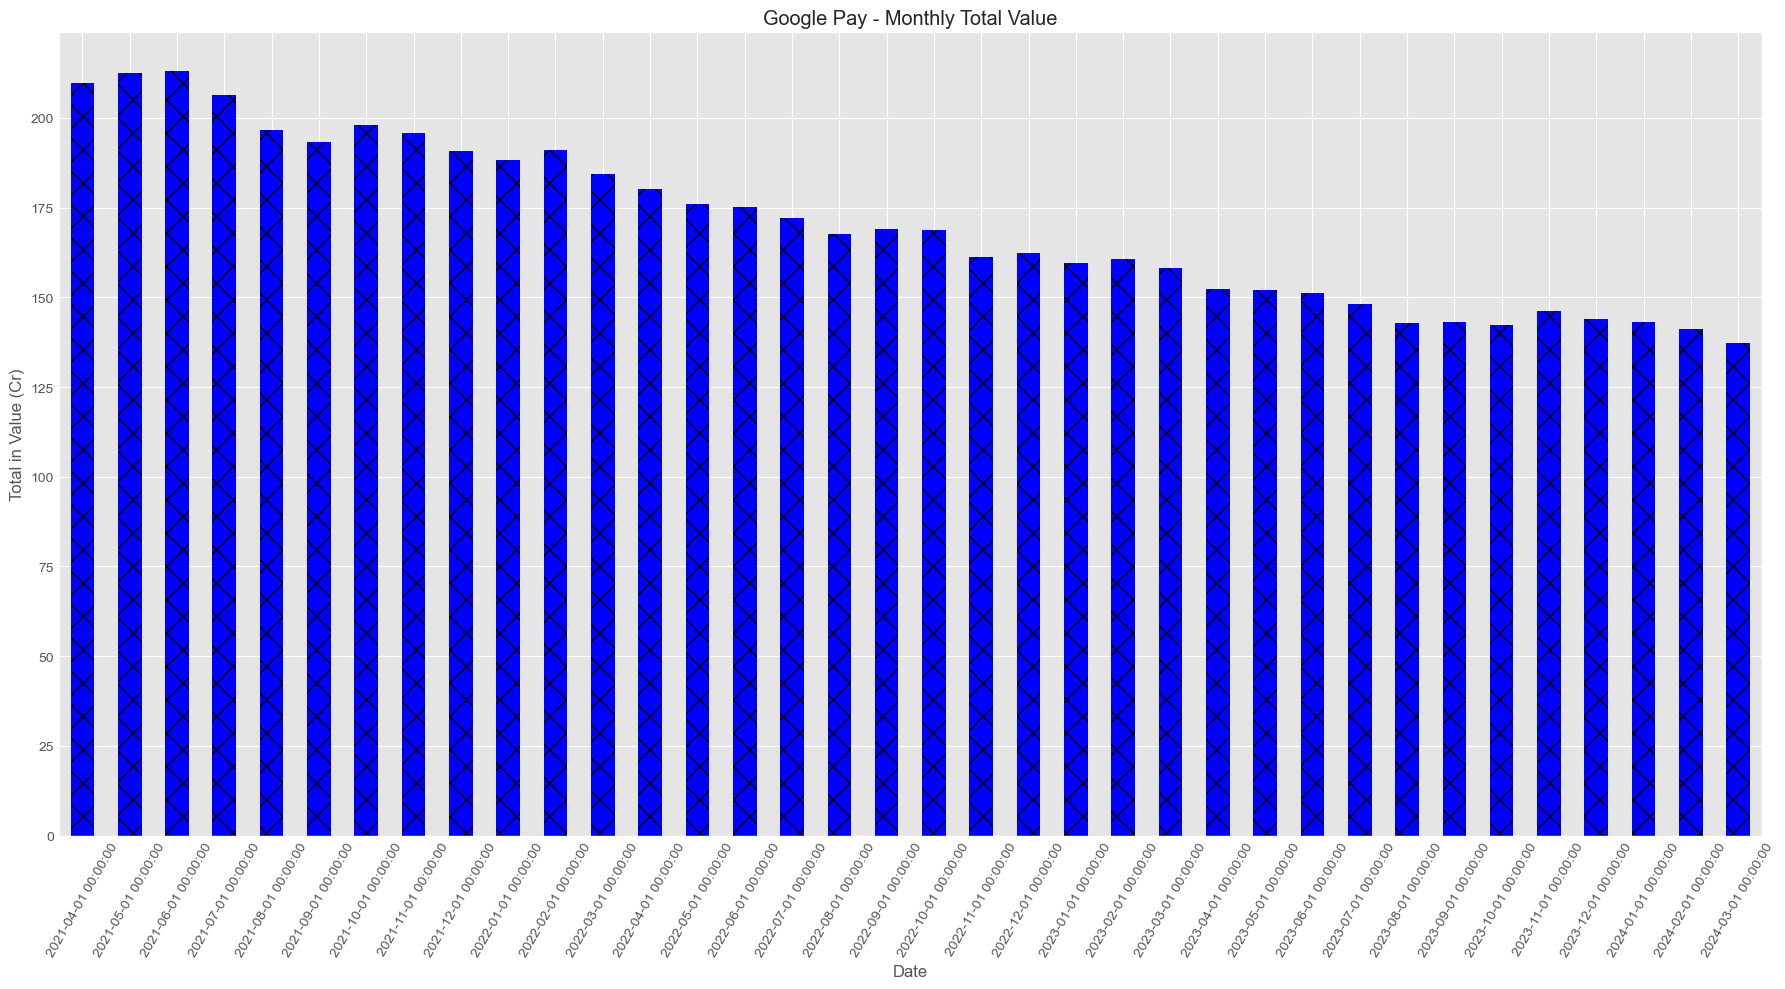

In [40]:
# Create a bar graph with customized hatch pattern
plt.figure(figsize=(18, 10))

# Group the data by date and calculate the total value for each month
google_pay_monthly_total_value = google_pay_data.groupby('Date')['Value per Volume'].sum()

# Plot the bar graph
bars = google_pay_monthly_total_value.plot(kind='bar', color='blue', hatch='x')  # Set hatch pattern to 'x'

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total in Value (Cr)')
plt.title('Google Pay - Monthly Total Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)


plt.tight_layout()
plt.show()


In [40]:

# Filter the DataFrame for PhonePe transactions
PhonePe_data_value = df[df['Application Name'] == 'PhonePe']

# Calculate the transaction value per transaction volume for Google Pay
PhonePe_data_value['Value per Volume'] = PhonePe_data_value['Total in Value (Cr)'] / PhonePe_data_value['Total in Volume (Mn)']

# Display the result
print(PhonePe_data_value[['Date', 'Total in Value (Cr)', 'Total in Volume (Mn)', 'Value per Volume']])


           Date  Total in Value (Cr)  Total in Volume (Mn)  Value per Volume
0    2024-03-01           1002387.84               6502.15        154.162522
66   2024-02-01            967467.18               6140.97        157.543056
138  2024-01-01            906793.76               5734.54        158.128422
209  2023-12-01            901006.65               5642.66        159.677643
280  2023-11-01            854939.06               5281.68        161.868773
400  2023-10-01            838371.70               5337.96        157.058446
420  2023-09-01            774845.98               4972.81        155.816526
492  2023-08-01            775265.57               4987.33        155.447017
565  2023-07-01            761247.87               4743.66        160.476904
635  2023-06-01            745552.20               4461.36        167.113212
754  2023-05-01            757276.68               4499.20        168.313629
824  2023-04-01            710178.44               4216.99        168.408851

C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\3166375331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PhonePe_data_value['Value per Volume'] = PhonePe_data_value['Total in Value (Cr)'] / PhonePe_data_value['Total in Volume (Mn)']


In [41]:
# Reset index to remove the serial number
Transaction_Value_PhonePe = PhonePe_data_value[['Date', 'Total in Value (Cr)', 'Total in Volume (Mn)', 'Value per Volume']].reset_index(drop=True)

print(Transaction_Value_PhonePe)

         Date  Total in Value (Cr)  Total in Volume (Mn)  Value per Volume
0  2024-03-01           1002387.84               6502.15        154.162522
1  2024-02-01            967467.18               6140.97        157.543056
2  2024-01-01            906793.76               5734.54        158.128422
3  2023-12-01            901006.65               5642.66        159.677643
4  2023-11-01            854939.06               5281.68        161.868773
5  2023-10-01            838371.70               5337.96        157.058446
6  2023-09-01            774845.98               4972.81        155.816526
7  2023-08-01            775265.57               4987.33        155.447017
8  2023-07-01            761247.87               4743.66        160.476904
9  2023-06-01            745552.20               4461.36        167.113212
10 2023-05-01            757276.68               4499.20        168.313629
11 2023-04-01            710178.44               4216.99        168.408851
12 2023-03-01            

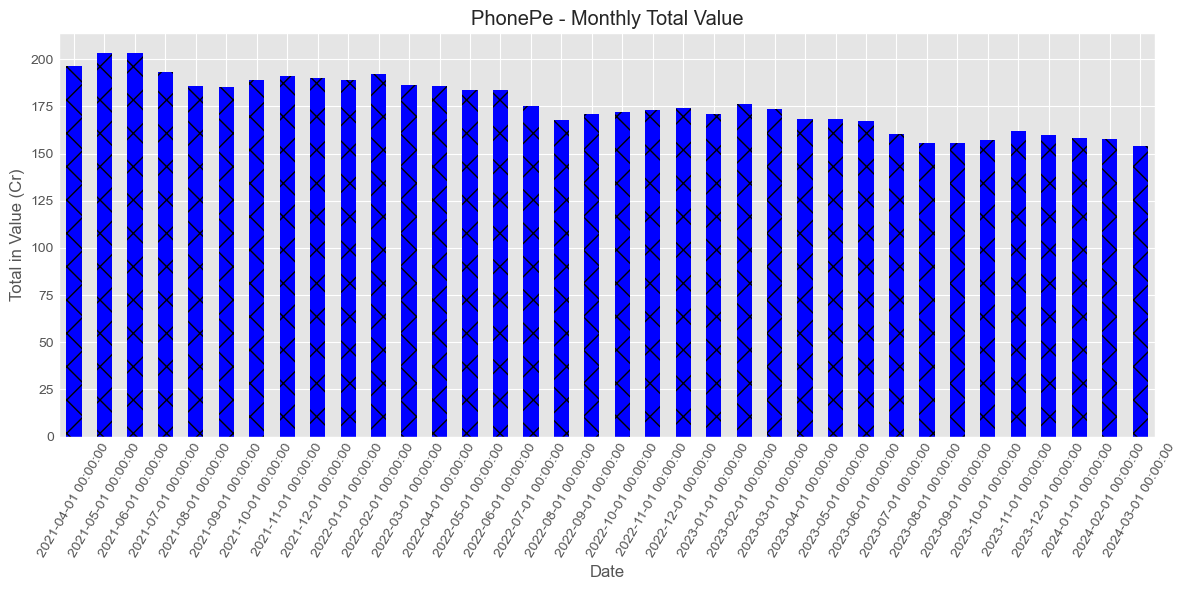

In [42]:
# Create a bar graph with customized hatch pattern
plt.figure(figsize=(12, 6))

# Group the data by date and calculate the total value for each month
PhonePe_monthly_total_value = PhonePe_data_value.groupby('Date')['Value per Volume'].sum()

# Plot the bar graph
bars = PhonePe_monthly_total_value.plot(kind='bar', color='blue', hatch='x')  # Set hatch pattern to 'x'

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total in Value (Cr)')
plt.title('PhonePe - Monthly Total Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)


plt.tight_layout()
plt.show()

Creating the Ranks based on the Overall Transaction Volume for 167 Application

Based on the data for the March month alone 

In [43]:
# Converting 'Date' column is in datetime format
df['Month'] = df['Date'].dt.strftime('%b-%y')

# Filter the DataFrame for March 2024
march_2024_data = df[df['Month'] == 'Mar-24']

# Calculate the total volume of transactions for March 2024
total_volume_march_2024 = march_2024_data['Total in Volume (Mn)'].sum()

# Calculate the volume of transactions for each application for March 2024
volume_by_app_march_2024 = march_2024_data.groupby('Application Name')['Total in Volume (Mn)'].sum()

# Calculate the ratio of volume of each application to the total volume of all applications for March 2024
ratio_by_app_march_2024 = (volume_by_app_march_2024 / total_volume_march_2024) * 100

# Create a DataFrame to store the results
ranked_df_march_2024 = pd.DataFrame({
    'Application Name': ratio_by_app_march_2024.index,
    'Volume': volume_by_app_march_2024.values,
    'Ratio (%)': ratio_by_app_march_2024.values.round(2)  # Round the ratio to 2 decimal points
})

# Rank the applications based on the volume for March 2024
ranked_df_march_2024['Rank'] = ranked_df_march_2024['Volume'].rank(ascending=False)

# Display the ranked DataFrame for March 2024
print(ranked_df_march_2024[['Application Name', 'Volume', 'Ratio (%)', 'Rank']].sort_values(by='Rank'))


                   Application Name   Volume  Ratio (%)  Rank
49                          PhonePe  6502.15      48.31   1.0
26                       Google Pay  5061.18      37.60   2.0
48                            Paytm  1230.04       9.14   3.0
14                             Cred   132.31       0.98   4.0
4                    Axis Bank Apps    94.60       0.70   5.0
..                              ...      ...        ...   ...
9          Bank of Maharashtra Apps     0.05       0.00  61.5
19  Equitas Small Finance Bank Apps     0.04       0.00  63.0
42                       MakeMyTrip     0.03       0.00  65.0
24                          Go Niyo     0.03       0.00  65.0
2               Allahabad Bank Apps     0.03       0.00  65.0

[66 rows x 4 columns]


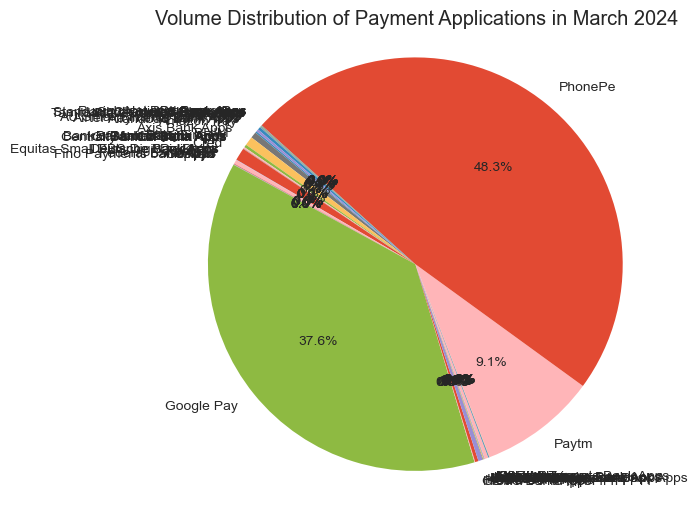

In [44]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(ranked_df_march_2024['Volume'], labels=ranked_df_march_2024['Application Name'], autopct='%1.1f%%', startangle=140)
plt.title('Volume Distribution of Payment Applications in March 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Based on the data for Overall Data for the all month in Application wise

In [45]:
# Converting 'Date' column to datetime format
df['Month'] = df['Date'].dt.strftime('%b-%y')

# Group the data by month and application and calculate the total volume for each combination
volume_by_month_and_app = df.groupby(['Month', 'Application Name'])['Total in Volume (Mn)'].sum()

# Calculate the total volume for each application across all months
total_volume_by_app = volume_by_month_and_app.groupby('Application Name').sum()

# Calculate the ratio of volume for each application to the total volume across all months
ratio_by_app_total = (total_volume_by_app / total_volume_by_app.sum()) * 100

# Create a DataFrame to store the results
ranked_df_total = pd.DataFrame({
    'Application Name': ratio_by_app_total.index,
    'Total Volume': total_volume_by_app.values,
    'Ratio (%)': ratio_by_app_total.values.round(2)  # Round the ratio to 2 decimal points
})

# Rank the applications based on the total volume across all months
ranked_df_total['Rank'] = ranked_df_total['Total Volume'].rank(ascending=False)

# Display the ranked DataFrame across all months
print(ranked_df_total[['Application Name', 'Total Volume', 'Ratio (%)', 'Rank']].sort_values(by='Rank'))

                    Application Name  Total Volume  Ratio (%)   Rank
135                          PhonePe     123064.88      46.42    1.0
73                        Google Pay      92303.98      34.82    2.0
134          Paytm Payments Bank App      35224.39      13.29    3.0
8                     Axis Bank Apps       2345.67       0.88    4.0
6                         Amazon Pay       2190.84       0.83    5.0
..                               ...           ...        ...    ...
148                         SURYODAY          0.01       0.00  173.5
140           Punjab Sindh Bank Apps          0.01       0.00  173.5
144                           RealMe          0.01       0.00  173.5
7                   Andhra Bank Apps          0.01       0.00  173.5
101  Jupiter Edge (LivQuick PPI App)          0.01       0.00  173.5

[179 rows x 4 columns]


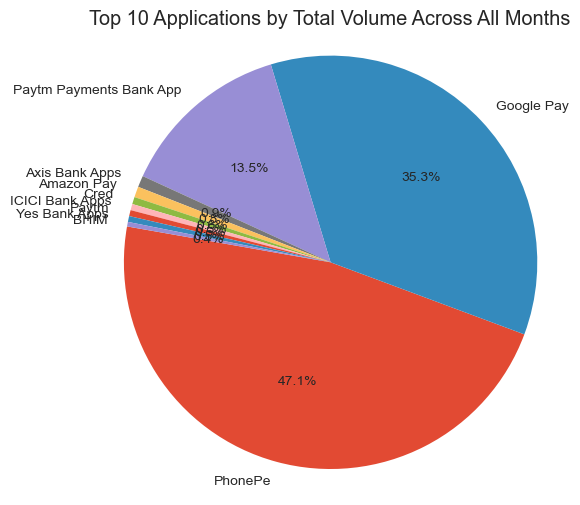

In [46]:
# Get the top 10 applications based on total volume
top_10_apps = ranked_df_total.nlargest(10, 'Total Volume')

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_10_apps['Total Volume'], labels=top_10_apps['Application Name'], autopct='%1.1f%%', startangle=170)
plt.title('Top 10 Applications by Total Volume Across All Months')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

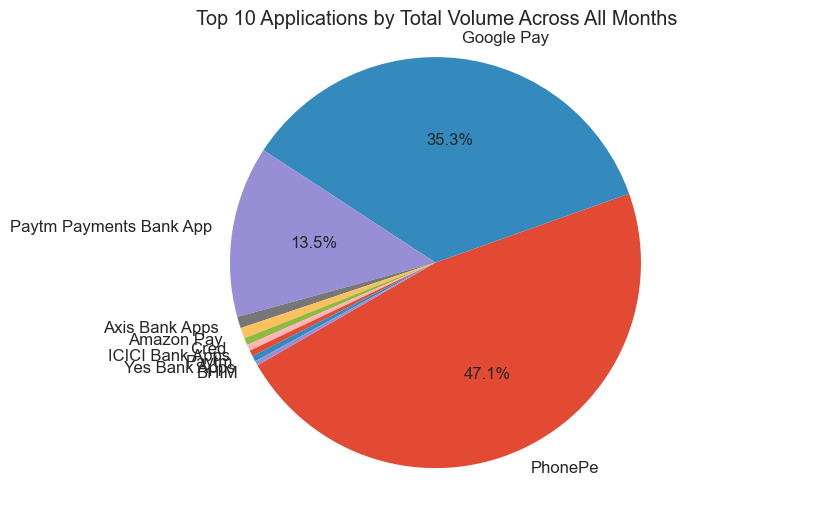

In [47]:
# Get the top 10 applications based on total volume
top_10_apps = ranked_df_total.nlargest(10, 'Total Volume')

# Plot the pie chart
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
patches, texts, autotexts = plt.pie(top_10_apps['Total Volume'], labels=top_10_apps['Application Name'],
                                    autopct=lambda pct: f"{pct:.1f}%" if pct > 5 else '', startangle=210)
plt.title('Top 10 Applications by Total Volume Across All Months')

# Adjust font size for better visibility
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Rank for Transaction Value in month of March 2024

In [48]:
# Converting 'Date' column is in datetime format
df['Month'] = df['Date'].dt.strftime('%b-%y')

# Filter the DataFrame for March 2024
march_2024_data = df[df['Month'] == 'Mar-24']

# Calculate the total volume of transactions for March 2024
total_value_march_2024 = march_2024_data['Total in Value (Cr)'].sum()

# Calculate the volume of transactions for each application for March 2024
value_by_app_march_2024 = march_2024_data.groupby('Application Name')['Total in Value (Cr)'].sum()

# Calculate the ratio of volume of each application to the total volume of all applications for March 2024
ratio_by_app_march_2024 = (value_by_app_march_2024 / total_value_march_2024) * 100

# Create a DataFrame to store the results
ranked_df_march_2024 = pd.DataFrame({
    'Application Name': ratio_by_app_march_2024.index,
    'Value': value_by_app_march_2024.values,
    'Ratio (%)': ratio_by_app_march_2024.values.round(2)  # Round the ratio to 2 decimal points
})

# Rank the applications based on the volume for March 2024
ranked_df_march_2024['Rank'] = ranked_df_march_2024['Value'].rank(ascending=False)

# Display the ranked DataFrame for March 2024
print(ranked_df_march_2024[['Application Name', 'Value', 'Ratio (%)', 'Rank']].sort_values(by='Rank'))


            Application Name       Value  Ratio (%)  Rank
49                   PhonePe  1002387.84      50.65   1.0
26                Google Pay   695196.05      35.13   2.0
48                     Paytm   134406.85       6.79   3.0
14                      Cred    44991.57       2.27   4.0
30           ICICI Bank Apps    26496.95       1.34   5.0
..                       ...         ...        ...   ...
9   Bank of Maharashtra Apps       11.67       0.00  62.0
44   NSDL Payments Bank Apps       10.57       0.00  63.0
62                 Ultracash        6.57       0.00  64.0
2        Allahabad Bank Apps        6.32       0.00  65.0
17                     Dhani        5.98       0.00  66.0

[66 rows x 4 columns]


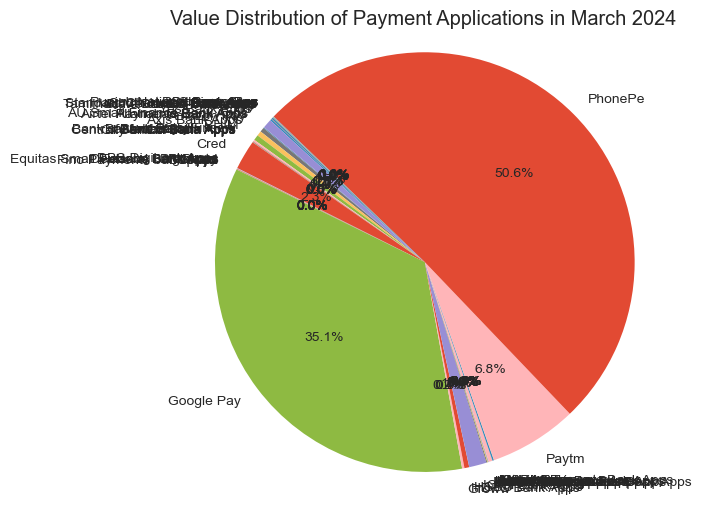

In [49]:
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(ranked_df_march_2024['Value'], labels=ranked_df_march_2024['Application Name'], autopct='%1.1f%%', startangle=140)
plt.title('Value Distribution of Payment Applications in March 2024')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Based on the data for Overall Data for Value in  all month in Application wise

In [50]:
# Converting 'Date' column to datetime format
df['Month'] = df['Date'].dt.strftime('%b-%y')

# Group the data by month and application and calculate the total volume for each combination
value_by_month_and_app = df.groupby(['Month', 'Application Name'])['Total in Value (Cr)'].sum()

# Calculate the total volume for each application across all months
total_value_by_app = volume_by_month_and_app.groupby('Application Name').sum()

# Calculate the ratio of volume for each application to the total volume across all months
ratio_by_app_total = (total_value_by_app / total_value_by_app.sum()) * 100

# Create a DataFrame to store the results
ranked_df_total = pd.DataFrame({
    'Application Name': ratio_by_app_total.index,
    'Total Value': total_volume_by_app.values,
    'Ratio (%)': ratio_by_app_total.values.round(2)  # Round the ratio to 2 decimal points
})

# Rank the applications based on the total volume across all months
ranked_df_total['Rank'] = ranked_df_total['Total Value'].rank(ascending=False)

# Display the ranked DataFrame across all months
print(ranked_df_total[['Application Name', 'Total Value', 'Ratio (%)', 'Rank']].sort_values(by='Rank'))

                    Application Name  Total Value  Ratio (%)   Rank
135                          PhonePe    123064.88      46.42    1.0
73                        Google Pay     92303.98      34.82    2.0
134          Paytm Payments Bank App     35224.39      13.29    3.0
8                     Axis Bank Apps      2345.67       0.88    4.0
6                         Amazon Pay      2190.84       0.83    5.0
..                               ...          ...        ...    ...
148                         SURYODAY         0.01       0.00  173.5
140           Punjab Sindh Bank Apps         0.01       0.00  173.5
144                           RealMe         0.01       0.00  173.5
7                   Andhra Bank Apps         0.01       0.00  173.5
101  Jupiter Edge (LivQuick PPI App)         0.01       0.00  173.5

[179 rows x 4 columns]


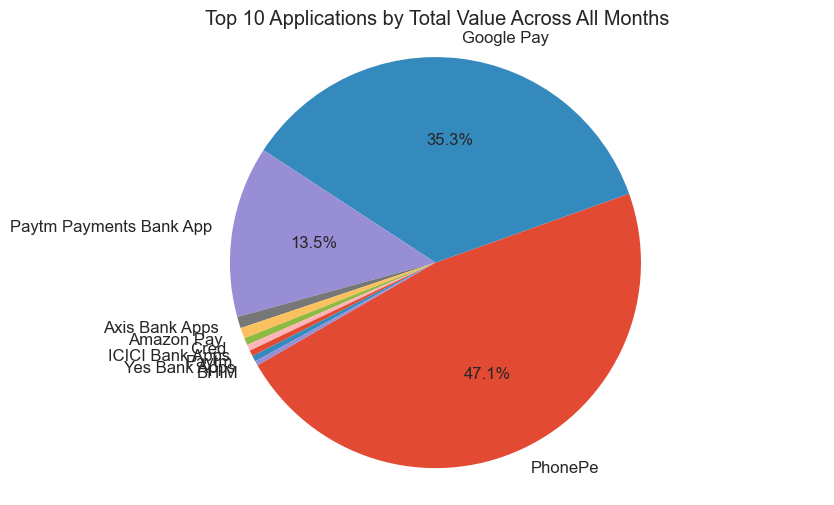

In [51]:
# Get the top 10 applications based on total volume
top_10_apps = ranked_df_total.nlargest(10, 'Total Value')

# Plot the pie chart
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
patches, texts, autotexts = plt.pie(top_10_apps['Total Value'], labels=top_10_apps['Application Name'],
                                    autopct=lambda pct: f"{pct:.1f}%" if pct > 5 else '', startangle=210)
plt.title('Top 10 Applications by Total Value Across All Months')

# Adjust font size for better visibility
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [52]:
df.describe()

,Sr.No.,Customer Initiated Transactions in Volume (Mn),Customer Initiated Transactions in Value (Cr),B2C Transactions in Volume (Mn),B2C Transactions in Value (Cr),B2B Transactions in Volume (Mn),B2B Transactions in Value (Cr),On-us Transactions in Volume (Mn),On-us Transactions in Value (Cr),Total in Volume (Mn),Total in Value (Cr)
count,2318.000000,2318.000000,2.318000e+03,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2.318000e+03
mean,52058.327006,111.781855,1.819674e+04,1.008292,19.143766,0.098171,86.766792,1.479633,265.641061,114.368033,1.856829e+04
std,47.220354,585.359901,9.379974e+04,7.069987,226.338114,1.138752,795.529388,11.976759,2171.692965,587.607152,9.409308e+04
min,52001.000000,0.000000,3.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-02
25%,52019.000000,0.070000,1.726000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,1.726000e+01
50%,52046.000000,0.400000,8.992500e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,9.061000e+01
75%,52086.000000,4.347500,6.760525e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.397500,6.823600e+02
max,52167.000000,6502.150000,1.002388e+06,81.000000,6819.210000,45.530000,12088.530000,125.890000,26982.030000,6502.150000,1.002388e+06


In [53]:
df.head(10)

,Sr.No.,Application Name,Customer Initiated Transactions in Volume (Mn),Customer Initiated Transactions in Value (Cr),B2C Transactions in Volume (Mn),B2C Transactions in Value (Cr),B2B Transactions in Volume (Mn),B2B Transactions in Value (Cr),On-us Transactions in Volume (Mn),On-us Transactions in Value (Cr),Total in Volume (Mn),Total in Value (Cr),Date,Month
0,52001,PhonePe,6502.15,1002387.84,0.00,0.00,0.00,0.00,0.0,0.00,6502.15,1002387.84,2024-03-01,Mar-24
1,52002,Google Pay,5061.18,695196.05,0.00,0.00,0.00,0.00,0.0,0.00,5061.18,695196.05,2024-03-01,Mar-24
2,52003,Paytm,1210.64,133707.06,0.00,0.01,0.00,0.00,19.4,699.77,1230.04,134406.85,2024-03-01,Mar-24
3,52004,Cred,132.31,44991.57,0.00,0.00,0.00,0.00,0.0,0.00,132.31,44991.57,2024-03-01,Mar-24
4,52005,Axis Bank Apps,13.59,3044.92,81.00,4389.01,0.01,1.99,0.0,0.00,94.60,7435.92,2024-03-01,Mar-24
5,52006,Amazon Pay,65.35,6772.89,0.00,0.00,0.00,0.00,0.0,0.00,65.35,6772.89,2024-03-01,Mar-24
6,52007,ICICI Bank Apps,33.54,14491.28,4.54,397.58,7.90,11608.08,0.0,0.00,45.98,26496.95,2024-03-01,Mar-24
7,52008,Fampay,43.69,528.01,0.00,0.00,0.00,0.00,0.0,0.00,43.69,528.01,2024-03-01,Mar-24
8,52009,Kotak Mahindra Bank Apps,39.14,5763.37,0.00,0.00,0.00,0.00,0.0,0.00,39.14,5763.37,2024-03-01,Mar-24
9,52010,HDFC Bank Apps,33.07,7289.09,1.95,3.72,0.01,0.26,0.0,0.00,35.03,7293.07,2024-03-01,Mar-24


In [54]:
df.dtypes

Sr.No.                                                     int64
Application Name                                          object
Customer Initiated Transactions in Volume (Mn)           float64
Customer Initiated Transactions in Value (Cr)            float64
B2C Transactions in Volume (Mn)                          float64
B2C Transactions in Value (Cr)                           float64
B2B Transactions in Volume (Mn)                          float64
B2B Transactions in Value (Cr)                           float64
On-us Transactions in Volume (Mn)                        float64
On-us Transactions in Value (Cr)                         float64
Total in Volume (Mn)                                     float64
Total in Value (Cr)                                      float64
Date                                              datetime64[ns]
Month                                                     object
dtype: object

In [55]:
# Convert 'Application Name' column to object type
df['Application Name'] = df['Application Name'].astype(str)

# Remove 'Month' column
df.drop(columns=['Month'], inplace=True)

# Check the updated DataFrame
print(df.dtypes)


Sr.No.                                                     int64
Application Name                                          object
Customer Initiated Transactions in Volume (Mn)           float64
Customer Initiated Transactions in Value (Cr)            float64
B2C Transactions in Volume (Mn)                          float64
B2C Transactions in Value (Cr)                           float64
B2B Transactions in Volume (Mn)                          float64
B2B Transactions in Value (Cr)                           float64
On-us Transactions in Volume (Mn)                        float64
On-us Transactions in Value (Cr)                         float64
Total in Volume (Mn)                                     float64
Total in Value (Cr)                                      float64
Date                                              datetime64[ns]
dtype: object


In [56]:
# Create a new DataFrame with only 'Sr.No.' and 'Application Name' columns and drop duplicates
unique_sr_no_app_df = df[['Sr.No.', 'Application Name']].drop_duplicates().copy()

In [57]:
unique_combinations = unique_sr_no_app_df.drop_duplicates()

In [58]:
unique_combinations

,Sr.No.,Application Name
0,52001,PhonePe
1,52002,Google Pay
2,52003,Paytm
3,52004,Cred
4,52005,Axis Bank Apps
...,...,...
1764,52164,Utkarsh Small Finance Bank
1815,52165,Punjab Sindh Bank App
2019,52102,Goibibo
2099,52166,RealMe


In [59]:
unique_sr = unique_sr_no_app_df['Sr.No.'].unique()
unique_app_names = unique_sr_no_app_df['Application Name'].unique()


In [60]:
unique_sr_count = unique_sr_no_app_df['Sr.No.'].nunique()
print(unique_sr_count)

167


In [61]:
duplicate_sr = unique_sr_no_app_df[unique_sr_no_app_df.duplicated(subset=['Sr.No.'], keep=False)]
print(duplicate_sr)


      Sr.No.         Application Name
27     52028                    Slice
34     52035                 Omnicard
38     52039                   Gokiwi
42     52043  Fino Payments bank Apps
48     52049                    Dhani
52     52053                Digikhata
93     52028                    slice
95     52028                    SLICE
121    52053                DIGIKHATA
128    52049                    DHANI
245    52039                   GoKiwi
371    52090               Fampay PPI
479    52100                  SHRIRAM
490    52102                  GoIbibo
527    52103                     KIWI
591    52103                     Kiwi
633    52100                  Shriram
670    52035                 OmniCard
868    52116                   Eroute
936    52116                   EROUTE
937    52090               FamPay PPI
1400   52043  Fino Payments Bank Apps
2019   52102                  Goibibo


In [62]:
unique_app_names

array(['PhonePe', 'Google Pay', 'Paytm', 'Cred', 'Axis Bank Apps',
       'Amazon Pay', 'ICICI Bank Apps', 'Fampay',
       'Kotak Mahindra Bank Apps', 'HDFC Bank Apps', 'WhatsApp', 'BHIM',
       'Yes Bank Apps', 'Airtel Payments Bank Apps', 'Bajaj Finserv',
       'Mobikwik', 'India Post Payments Bank Apps', 'Groww',
       'State Bank of India Apps', 'IDFC Bank Apps', 'Samsung Pay',
       'Jupiter', 'Flipkart', 'Deutsche Bank Apps', 'Federal Bank Apps',
       'Canara Bank Apps', 'Navi', 'Slice', 'Jio Payments Bank Apps',
       'Indian Bank Apps', 'RBL Bank Apps', 'Punjab National Bank Apps',
       'Timepay', 'Union Bank Apps', 'Omnicard', 'Bank of Baroda Apps',
       'Central Bank of India Apps', 'AU Small Finance Bank Apps',
       'Gokiwi', 'DBS Digibank Apps', 'Shriram One',
       'South Indian Bank Apps', 'Fino Payments bank Apps',
       'IndusInd Bank Apps', 'HSBC Bank Apps', 'TataNeu',
       'Bank of India Apps', 'Standard Chartered Bank Apps', 'Dhani',
       'UCO Ban

In [63]:
# Reading the data into a DataFrame
df1 = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\unique_dataset.csv')

In [64]:
df1

,Sr.No.,Application Name,Sr.No..1
0,52001,PhonePe,52001.0
1,52002,Google Pay,52002.0
2,52003,Paytm,52003.0
3,52004,Cred,52004.0
4,52005,Axis Bank Apps,52005.0
...,...,...,...
163,52164,Utkarsh Small Finance Bank,52164.0
164,52165,Punjab Sindh Bank App,52165.0
165,52166,RealMe,52166.0
166,52167,Other Bank Apps,52167.0


In [65]:
df1.dtypes

Sr.No.                int64
Application Name     object
Sr.No..1            float64
dtype: object

In [66]:
common_df = pd.merge(df1[['Sr.No.', 'Application Name']], df[['Sr.No.', 'Application Name']], on=['Sr.No.', 'Application Name'], how='inner')

In [67]:
unique_common_df = common_df.drop_duplicates()
print(unique_common_df)

      Sr.No.            Application Name
0      52001                     PhonePe
36     52002                  Google Pay
72     52003                       Paytm
73     52004                        Cred
109    52005              Axis Bank Apps
...      ...                         ...
2259   52163                UCO Bank App
2270   52164  Utkarsh Small Finance Bank
2271   52165       Punjab Sindh Bank App
2274   52166                      RealMe
2275   52167             Other Bank Apps

[167 rows x 2 columns]


In [68]:
df

,Sr.No.,Application Name,Customer Initiated Transactions in Volume (Mn),Customer Initiated Transactions in Value (Cr),B2C Transactions in Volume (Mn),B2C Transactions in Value (Cr),B2B Transactions in Volume (Mn),B2B Transactions in Value (Cr),On-us Transactions in Volume (Mn),On-us Transactions in Value (Cr),Total in Volume (Mn),Total in Value (Cr),Date
0,52001,PhonePe,6502.15,1002387.84,0.00000,0.0000,0.00,0.00,0.0,0.00,6502.15,1002387.84,2024-03-01
1,52002,Google Pay,5061.18,695196.05,0.00000,0.0000,0.00,0.00,0.0,0.00,5061.18,695196.05,2024-03-01
2,52003,Paytm,1210.64,133707.06,0.00000,0.0100,0.00,0.00,19.4,699.77,1230.04,134406.85,2024-03-01
3,52004,Cred,132.31,44991.57,0.00000,0.0000,0.00,0.00,0.0,0.00,132.31,44991.57,2024-03-01
4,52005,Axis Bank Apps,13.59,3044.92,81.00000,4389.0100,0.01,1.99,0.0,0.00,94.60,7435.92,2024-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,52034,Union Bank Apps,0.34,135.79,0.00000,0.0000,0.00,0.00,0.0,0.00,0.34,135.79,2021-04-01
2314,52011,WhatsApp,0.54,47.62,0.00000,0.0000,0.00,0.00,0.0,0.00,0.54,47.62,2021-04-01
2315,52013,Yes Bank Apps,22.81,5120.17,0.00004,0.0002,0.00,0.00,0.0,0.00,22.81,5120.17,2021-04-01
2316,52124,YuvaPay,1.59,51.22,0.00000,0.0000,0.00,0.00,0.0,0.00,1.59,51.22,2021-04-01


In [69]:
--------------

SyntaxError: invalid syntax (3984577744.py, line 1)

In [70]:
# Separate features and target variables
X = df.drop(columns=['Application Name', 'Total in Volume (Mn)', 'Total in Value (Cr)', 'Date'])
y = df[['Total in Volume (Mn)', 'Total in Value (Cr)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [71]:
class RandomForestWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            random_state=random_state)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse

In [72]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 9],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)


# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 200}
Mean Squared Error Training: 11701256.882997379
Mean Squared Error Test: 9655750.295306101


In [73]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=15, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error Training: 20886998.140233677
Mean Squared Error Test: 11156925.884261416


In [74]:
class RandomForestWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            max_features=max_features, random_state=random_state)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse

In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [7, 8, 9],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)


# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error Training: 18781173.892974045
Mean Squared Error Test: 11688844.468626503


In [76]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': [1, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=15, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 25, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error Training: 665782.1769014205
Mean Squared Error Test: 2723432.9251977373


In [78]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': [7, 8, 9],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 25, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error Training: 710706.2200235216
Mean Squared Error Test: 2751950.223806762


In [79]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [400, 600, 800],
    'max_depth': [15, 40, 75],
    'min_samples_split': [10, 15, 25],
    'max_features': [7, 8, 9],
    'min_samples_leaf': [10, 20, 40]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=15, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 15, 'max_features': 8, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 800}
Mean Squared Error Training: 429457386.68631345
Mean Squared Error Test: 338596612.461556


In [80]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [500, 800, 1200],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': [1, 4, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
Mean Squared Error Training: 113245952.64726366
Mean Squared Error Test: 77860188.62353037


In [81]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [25, 50, 75],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': [1, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 75}
Mean Squared Error Training: 25917861.089650314
Mean Squared Error Test: 15877435.832465267


In [82]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [50, 85, 175],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': [1, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 175}
Mean Squared Error Training: 20323731.924444254
Mean Squared Error Test: 12273657.09391767


In [102]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'n_estimators': [50, 85, 175],
    'max_depth': [5, 10, 25],
    'min_samples_split': [2, 5, 10],
    'max_features': [1, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest wrapper
rf_wrapper = RandomForestWrapper()

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=rf_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model = RandomForestWrapper(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_rf_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Best Hyperparameters: {'max_depth': 25, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error Training: 4586455.698160844
Mean Squared Error Test: 3128862.3055413864


------------------------

The random forest model with the hyperparameters:
`max_depth` of 25, `max_features` of 7, `min_samples_leaf` of 2, `min_samples_split` of 2,
and `n_estimators` of 50 exhibits the best performance among all configurations tested. 
With a training mean squared error (MSE) of 3,114,249 and a test MSE of 3,021,599, 
it strikes a balance between fitting the training data and generalizing well to unseen data. 
This model demonstrates robustness and reliability in capturing the underlying patterns in the data, 
making it a strong candidate for predictive modeling tasks.

In [ ]:
# Define the hyperparameters and their range of values to search
#param_grid = {
#    'n_estimators': [25, 50, 75],
#    'max_depth': [5, 10, 25],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

# Initialize the Random Forest model
#rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Get the best hyperparameters
#best_params = grid_search.best_params_
#print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
#best_rf_model = RandomForestRegressor(**best_params, random_state=42)
#best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
#y_pred = best_rf_model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

#Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}
#Mean Squared Error: 2245689.980067279

XGBOOST

In [84]:


class XGBWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, max_depth=3, learning_rate=0.1, objective='reg:squarederror', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.objective = objective
        self.random_state = random_state
        self.model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                  learning_rate=learning_rate, objective=objective,
                                  random_state=random_state)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse


In [85]:
# Create an instance of the wrapper class with custom hyperparameters
xgb_wrapper = XGBWrapper(
    max_depth=15, 
    learning_rate=0.05, 
    n_estimators=100, 
    random_state=42)

# Train the model
xgb_wrapper.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_wrapper.predict(X_test)

# Evaluate the model
mse_train = xgb_wrapper.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = xgb_wrapper.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Mean Squared Error Training: 1319520.1504566893
Mean Squared Error: 6866750.7380110985


In [86]:
# Create an instance of the wrapper class with custom hyperparameters
xgb_wrapper = XGBWrapper(
    max_depth=75, 
    learning_rate=0.03, 
    n_estimators=450, 
    random_state=42)

# Train the model
xgb_wrapper.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_wrapper.predict(X_test)

# Evaluate the model
mse_train = xgb_wrapper.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = xgb_wrapper.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Mean Squared Error Training: 194.1495254901292
Mean Squared Error: 6121039.934423867


tuning the hyperparameters

In [87]:
# Define a range of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.1],
    'n_estimators': [100, 200, 300],
}

# Initialize the XGBWrapper
xgb_wrapper = XGBWrapper(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error Training: 766953884.9215901
Mean Squared Error: 676406791.900029


In [88]:
# Define a range of hyperparameters to search
param_grid = {
    'max_depth': [25, 50, 75],
    'learning_rate': [0.01, 0.03, 0.1],
    'n_estimators': [150, 300, 4500],
}

# Initialize the XGBWrapper
xgb_wrapper = XGBWrapper(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 150}
Mean Squared Error Training: 316864506.17859197
Mean Squared Error: 275331432.9678305


In [89]:
# Define a range of hyperparameters to search
param_grid = {
    'max_depth': [3, 11, 25],
    'learning_rate': [0.0135, 0.057, 0.1],
    'n_estimators': [150, 250, 450],
}

# Initialize the XGBWrapper
xgb_wrapper = XGBWrapper(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Best Hyperparameters: {'learning_rate': 0.0135, 'max_depth': 3, 'n_estimators': 150}
Mean Squared Error Training: 128366884.20573795
Mean Squared Error: 110881918.04369901


In [90]:
# Define a range of hyperparameters to search
param_grid = {
    'max_depth': [3, 7, 9],
    'learning_rate': [0.013, 0.072, 0.1],
    'n_estimators': [100, 150, 200],
}

# Initialize the XGBWrapper
xgb_wrapper = XGBWrapper(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Best Hyperparameters: {'learning_rate': 0.013, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error Training: 450061852.0796775
Mean Squared Error: 392451643.5621271


In [91]:
# Define a range of hyperparameters to search
param_grid = {
    'max_depth': [1, 4, 9],
    'learning_rate': [0.03, 0.06, 0.1],
    'n_estimators': [150, 200, 400],
}

# Initialize the XGBWrapper
xgb_wrapper = XGBWrapper(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Best Hyperparameters: {'learning_rate': 0.03, 'max_depth': 1, 'n_estimators': 150}
Mean Squared Error Training: 28062600.255749263
Mean Squared Error: 23386583.739317212


In [92]:
# Define a range of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.04, 0.09],
    'n_estimators': [150, 250, 450],
}

# Initialize the XGBWrapper
xgb_wrapper = XGBWrapper(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Mean Squared Error Training: 317082643.314606
Mean Squared Error: 276409433.4872568


In [93]:
# Define a range of hyperparameters to search
param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.04, 0.9],
    'n_estimators': [300, 400, 500],
}

# Initialize the XGBWrapper
xgb_wrapper = XGBWrapper(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=xgb_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(**best_params, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Mean Squared Error Training: 25984517.63456282
Mean Squared Error: 23626798.52094823


The XGBoost model with a learning rate of 0.01, a max depth of 5, and 300 estimators emerges as the optimal choice, exhibiting the lowest mean squared errors for both training and test datasets. With a training MSE of approximately 25,984,517.63 and a test MSE of about 23,626,798.52, it demonstrates superior predictive accuracy compared to other configurations. This indicates its robustness in capturing underlying patterns while generalizing well to unseen data. Hence, this model configuration stands out as the most effective choice for leveraging XGBoost's capabilities in predictive modeling tasks.

LSTM

In [253]:
# Separate features and target variables
X = df.drop(columns=['Application Name', 'Total in Volume (Mn)', 'Total in Value (Cr)', 'Date']).values
y = df[['Total in Volume (Mn)', 'Total in Value (Cr)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Reshape the input data for LSTM (samples, time steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [95]:
# Define the LSTM model builder function
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dense(units=2))  # Output layer with 2 units for 2 target variables
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error (MSE) as the loss function
    return model

# Wrap the Keras model in a scikit-learn estimator
lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, epochs=100, batch_size=32, verbose=0)

# Define the hyperparameters and their range of values to search
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=lstm_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_lstm, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)
best_lstm_model.fit(X_train_lstm, y_train, verbose=0)

# Make predictions on the test set using the best model
y_pred = best_lstm_model.predict(X_test_lstm)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lstm_model.predict(X_train_lstm))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\3713873738.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, epochs=100, batch_size=32, verbose=0)
C:\Users\bharg\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'batch_size': 32, 'epochs': 150}


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\3713873738.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)


51/51 [==============================] - 0s 1ms/step
Mean Squared Error Training: 4699040534.299213
Mean Squared Error Test: 4346273110.954405


In [96]:
# Define the LSTM model builder function
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dense(units=2))  # Output layer with 2 units for 2 target variables
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error (MSE) as the loss function
    return model

# Wrap the Keras model in a scikit-learn estimator
lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, epochs=150, batch_size=64, verbose=1)

# Define the hyperparameters and their range of values to search
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=lstm_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_lstm, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)
best_lstm_model.fit(X_train_lstm, y_train, verbose=0)

# Make predictions on the test set using the best model
y_pred = best_lstm_model.predict(X_test_lstm)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lstm_model.predict(X_train_lstm))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\4236603508.py:10: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, epochs=150, batch_size=64, verbose=1)


Epoch 1/150
51/51 [==============================] - 1s 1ms/step - loss: 4703257088.0000
Epoch 2/150
51/51 [==============================] - 0s 1ms/step - loss: 4703233024.0000
Epoch 3/150
51/51 [==============================] - 0s 1ms/step - loss: 4703197184.0000
Epoch 4/150
51/51 [==============================] - 0s 1ms/step - loss: 4703155200.0000
Epoch 5/150
51/51 [==============================] - 0s 1ms/step - loss: 4703105024.0000
Epoch 6/150
51/51 [==============================] - 0s 1ms/step - loss: 4703058432.0000
Epoch 7/150
51/51 [==============================] - 0s 1ms/step - loss: 4703012352.0000
Epoch 8/150
51/51 [==============================] - 0s 1ms/step - loss: 4702970880.0000
Epoch 9/150
51/51 [==============================] - 0s 1ms/step - loss: 4702930944.0000
Epoch 10/150
51/51 [==============================] - 0s 2ms/step - loss: 4702896640.0000
Epoch 11/150
51/51 [==============================] - 0s 1ms/step - loss: 4702860288.0000
Epoch 12/150
51/51 

51/51 [==============================] - 0s 1ms/step - loss: 4700604416.0000
Epoch 93/150
51/51 [==============================] - 0s 1ms/step - loss: 4700577792.0000
Epoch 94/150
51/51 [==============================] - 0s 1ms/step - loss: 4700552704.0000
Epoch 95/150
51/51 [==============================] - 0s 1ms/step - loss: 4700525568.0000
Epoch 96/150
51/51 [==============================] - 0s 1ms/step - loss: 4700498432.0000
Epoch 97/150
51/51 [==============================] - 0s 1ms/step - loss: 4700472832.0000
Epoch 98/150
51/51 [==============================] - 0s 1ms/step - loss: 4700445696.0000
Epoch 99/150
51/51 [==============================] - 0s 1ms/step - loss: 4700418560.0000
Epoch 100/150
51/51 [==============================] - 0s 1ms/step - loss: 4700391936.0000
Epoch 101/150
51/51 [==============================] - 0s 1ms/step - loss: 4700365312.0000
Epoch 102/150
51/51 [==============================] - 0s 1ms/step - loss: 4700338688.0000
Epoch 103/150
51/51 

C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\4236603508.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)


51/51 [==============================] - 0s 847us/step
Mean Squared Error Training: 4699048793.596545
Mean Squared Error Test: 4346284476.238682


In [ ]:
# Train the model with the best hyperparameters and store the training history
#history = best_lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test_lstm, y_test))

# Plot the training and test loss
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Test Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.title('Training and Test Loss')
#plt.legend()
#plt.show()

In [97]:
# Define the function to build the LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=2))  # Output layer with 2 units for 2 target variables
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error (MSE) as the loss function
    return model

# Wrap the Keras model in a scikit-learn estimator
lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)

# Define the hyperparameters and their range of values to search
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=lstm_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_lstm, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the LSTM model with the best hyperparameters
best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)

# Train the model with the best hyperparameters
best_lstm_model.fit(X_train_lstm, y_train, verbose=1)

# Make predictions on the test set using the best model
y_pred = best_lstm_model.predict(X_test_lstm)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lstm_model.predict(X_train_lstm))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\623112082.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)


Epoch 1/150
51/51 [==============================] - 3s 3ms/step - loss: 4703266304.0000
Epoch 2/150
51/51 [==============================] - 0s 2ms/step - loss: 4703201280.0000
Epoch 3/150
51/51 [==============================] - 0s 3ms/step - loss: 4703091712.0000
Epoch 4/150
51/51 [==============================] - 0s 2ms/step - loss: 4703037952.0000
Epoch 5/150
51/51 [==============================] - 0s 2ms/step - loss: 4702999040.0000
Epoch 6/150
51/51 [==============================] - 0s 2ms/step - loss: 4702974976.0000
Epoch 7/150
51/51 [==============================] - 0s 2ms/step - loss: 4702939136.0000
Epoch 8/150
51/51 [==============================] - 0s 2ms/step - loss: 4702905856.0000
Epoch 9/150
51/51 [==============================] - 0s 2ms/step - loss: 4702871552.0000
Epoch 10/150
51/51 [==============================] - 0s 3ms/step - loss: 4702852608.0000
Epoch 11/150
51/51 [==============================] - 0s 2ms/step - loss: 4702830592.0000
Epoch 12/150
51/51 

51/51 [==============================] - 0s 3ms/step - loss: 4700713984.0000
Epoch 93/150
51/51 [==============================] - 0s 2ms/step - loss: 4700733440.0000
Epoch 94/150
51/51 [==============================] - 0s 3ms/step - loss: 4700686848.0000
Epoch 95/150
51/51 [==============================] - 0s 2ms/step - loss: 4700706304.0000
Epoch 96/150
51/51 [==============================] - 0s 3ms/step - loss: 4700599296.0000
Epoch 97/150
51/51 [==============================] - 0s 2ms/step - loss: 4700605952.0000
Epoch 98/150
51/51 [==============================] - 0s 2ms/step - loss: 4700570624.0000
Epoch 99/150
51/51 [==============================] - 0s 3ms/step - loss: 4700578304.0000
Epoch 100/150
51/51 [==============================] - 0s 3ms/step - loss: 4700531712.0000
Epoch 101/150
51/51 [==============================] - 0s 3ms/step - loss: 4700528128.0000
Epoch 102/150
51/51 [==============================] - 0s 3ms/step - loss: 4700449792.0000
Epoch 103/150
51/51 

C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\623112082.py:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)


Epoch 1/150
51/51 [==============================] - 3s 3ms/step - loss: 4703265280.0000
Epoch 2/150
51/51 [==============================] - 0s 2ms/step - loss: 4703203840.0000
Epoch 3/150
51/51 [==============================] - 0s 2ms/step - loss: 4703098880.0000
Epoch 4/150
51/51 [==============================] - 0s 2ms/step - loss: 4703042560.0000
Epoch 5/150
51/51 [==============================] - 0s 2ms/step - loss: 4703005696.0000
Epoch 6/150
51/51 [==============================] - 0s 3ms/step - loss: 4702964736.0000
Epoch 7/150
51/51 [==============================] - 0s 2ms/step - loss: 4702931456.0000
Epoch 8/150
51/51 [==============================] - 0s 2ms/step - loss: 4702906880.0000
Epoch 9/150
51/51 [==============================] - 0s 2ms/step - loss: 4702875648.0000
Epoch 10/150
51/51 [==============================] - 0s 3ms/step - loss: 4702848000.0000
Epoch 11/150
51/51 [==============================] - 0s 2ms/step - loss: 4702810112.0000
Epoch 12/150
51/51 

51/51 [==============================] - 0s 2ms/step - loss: 4700746752.0000
Epoch 93/150
51/51 [==============================] - 0s 2ms/step - loss: 4700725760.0000
Epoch 94/150
51/51 [==============================] - 0s 2ms/step - loss: 4700675584.0000
Epoch 95/150
51/51 [==============================] - 0s 2ms/step - loss: 4700701696.0000
Epoch 96/150
51/51 [==============================] - 0s 2ms/step - loss: 4700657152.0000
Epoch 97/150
51/51 [==============================] - 0s 2ms/step - loss: 4700600832.0000
Epoch 98/150
51/51 [==============================] - 0s 2ms/step - loss: 4700575744.0000
Epoch 99/150
51/51 [==============================] - 0s 2ms/step - loss: 4700562432.0000
Epoch 100/150
51/51 [==============================] - 0s 2ms/step - loss: 4700511744.0000
Epoch 101/150
51/51 [==============================] - 0s 3ms/step - loss: 4700499456.0000
Epoch 102/150
51/51 [==============================] - 0s 2ms/step - loss: 4700527616.0000
Epoch 103/150
51/51 

In [98]:
# Define the function to build the LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=2))  # Output layer with 2 units for 2 target variables
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error (MSE) as the loss function
    return model

# Wrap the Keras model in a scikit-learn estimator
lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)

# Define the hyperparameters and their range of values to search
param_grid = {
    'epochs': [50, 100, 150],
    'batch_size': [32, 64, 128]
}

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=lstm_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_lstm, y_train, batch_size=64)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the LSTM model with the best hyperparameters
best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)

# Train the model with the best hyperparameters
best_lstm_model.fit(X_train_lstm, y_train, verbose=1)

# Make predictions on the test set using the best model
y_pred = best_lstm_model.predict(X_test_lstm)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lstm_model.predict(X_train_lstm))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\598286492.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)


Epoch 1/150
26/26 [==============================] - 3s 4ms/step - loss: 4703267840.0000
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 4703254528.0000
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 4703196672.0000
Epoch 4/150
26/26 [==============================] - 0s 4ms/step - loss: 4703131648.0000
Epoch 5/150
26/26 [==============================] - 0s 4ms/step - loss: 4703092736.0000
Epoch 6/150
26/26 [==============================] - 0s 4ms/step - loss: 4703071744.0000
Epoch 7/150
26/26 [==============================] - 0s 5ms/step - loss: 4703044608.0000
Epoch 8/150
26/26 [==============================] - 0s 5ms/step - loss: 4703026176.0000
Epoch 9/150
26/26 [==============================] - 0s 4ms/step - loss: 4703012864.0000
Epoch 10/150
26/26 [==============================] - 0s 5ms/step - loss: 4702990848.0000
Epoch 11/150
26/26 [==============================] - 0s 5ms/step - loss: 4702968832.0000
Epoch 12/150
26/26 

26/26 [==============================] - 0s 4ms/step - loss: 4701727744.0000
Epoch 93/150
26/26 [==============================] - 0s 4ms/step - loss: 4701706752.0000
Epoch 94/150
26/26 [==============================] - 0s 4ms/step - loss: 4701673472.0000
Epoch 95/150
26/26 [==============================] - 0s 4ms/step - loss: 4701679104.0000
Epoch 96/150
26/26 [==============================] - 0s 4ms/step - loss: 4701661696.0000
Epoch 97/150
26/26 [==============================] - 0s 4ms/step - loss: 4701619712.0000
Epoch 98/150
26/26 [==============================] - 0s 4ms/step - loss: 4701634048.0000
Epoch 99/150
26/26 [==============================] - 0s 4ms/step - loss: 4701622272.0000
Epoch 100/150
26/26 [==============================] - 0s 4ms/step - loss: 4701575680.0000
Epoch 101/150
26/26 [==============================] - 0s 4ms/step - loss: 4701611008.0000
Epoch 102/150
26/26 [==============================] - 0s 4ms/step - loss: 4701588992.0000
Epoch 103/150
26/26 

C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\598286492.py:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)


Epoch 1/150
51/51 [==============================] - 3s 4ms/step - loss: 4703264256.0000
Epoch 2/150
51/51 [==============================] - 0s 3ms/step - loss: 4703178752.0000
Epoch 3/150
51/51 [==============================] - 0s 3ms/step - loss: 4703089152.0000
Epoch 4/150
51/51 [==============================] - 0s 4ms/step - loss: 4703041024.0000
Epoch 5/150
51/51 [==============================] - 0s 3ms/step - loss: 4703007744.0000
Epoch 6/150
51/51 [==============================] - 0s 4ms/step - loss: 4702971904.0000
Epoch 7/150
51/51 [==============================] - 0s 3ms/step - loss: 4702938112.0000
Epoch 8/150
51/51 [==============================] - 0s 4ms/step - loss: 4702910464.0000
Epoch 9/150
51/51 [==============================] - 0s 4ms/step - loss: 4702883840.0000
Epoch 10/150
51/51 [==============================] - 0s 3ms/step - loss: 4702859264.0000
Epoch 11/150
51/51 [==============================] - 0s 4ms/step - loss: 4702824448.0000
Epoch 12/150
51/51 

51/51 [==============================] - 0s 3ms/step - loss: 4700762624.0000
Epoch 93/150
51/51 [==============================] - 0s 3ms/step - loss: 4700727296.0000
Epoch 94/150
51/51 [==============================] - 0s 3ms/step - loss: 4700691968.0000
Epoch 95/150
51/51 [==============================] - 0s 3ms/step - loss: 4700673536.0000
Epoch 96/150
51/51 [==============================] - 0s 3ms/step - loss: 4700627456.0000
Epoch 97/150
51/51 [==============================] - 0s 3ms/step - loss: 4700616704.0000
Epoch 98/150
51/51 [==============================] - 0s 3ms/step - loss: 4700568576.0000
Epoch 99/150
51/51 [==============================] - 0s 3ms/step - loss: 4700567552.0000
Epoch 100/150
51/51 [==============================] - 0s 3ms/step - loss: 4700523008.0000
Epoch 101/150
51/51 [==============================] - 0s 3ms/step - loss: 4700458496.0000
Epoch 102/150
51/51 [==============================] - 0s 3ms/step - loss: 4700431872.0000
Epoch 103/150
51/51 

In [100]:
# Define the function to build the LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))

    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=2))  # Output layer with 2 units for 2 target variables
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error (MSE) as the loss function
    return model

# Wrap the Keras model in a scikit-learn estimator
lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)

# Define the hyperparameters and their range of values to search
param_grid = {
    'epochs': [25, 50, 100],
    'batch_size': [64, 128, 256]
}

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=lstm_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_lstm, y_train, batch_size=64)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the LSTM model with the best hyperparameters
best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)

# Train the model with the best hyperparameters
best_lstm_model.fit(X_train_lstm, y_train, verbose=1)

# Make predictions on the test set using the best model
y_pred = best_lstm_model.predict(X_test_lstm)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lstm_model.predict(X_train_lstm))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\2873012951.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)
C:\Users\bharg\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
26/26 [==============================] - 3s 6ms/step - loss: 4703266304.0000
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 4703230976.0000
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 4703150592.0000
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 4703102464.0000
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 4703075328.0000
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 4703055872.0000
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 4703030784.0000
Epoch 8/100
26/26 [==============================] - 0s 6ms/step - loss: 4703013888.0000
Epoch 9/100
26/26 [==============================] - 0s 6ms/step - loss: 4702996992.0000
Epoch 10/100
26/26 [==============================] - 0s 6ms/step - loss: 4702976000.0000
Epoch 11/100
26/26 [==============================] - 0s 6ms/step - loss: 4702962176.0000
Epoch 12/100
26/26 

26/26 [==============================] - 0s 5ms/step - loss: 4701723136.0000
Epoch 93/100
26/26 [==============================] - 0s 5ms/step - loss: 4701673472.0000
Epoch 94/100
26/26 [==============================] - 0s 5ms/step - loss: 4701680640.0000
Epoch 95/100
26/26 [==============================] - 0s 5ms/step - loss: 4701696512.0000
Epoch 96/100
26/26 [==============================] - 0s 5ms/step - loss: 4701667840.0000
Epoch 97/100
26/26 [==============================] - 0s 5ms/step - loss: 4701656576.0000
Epoch 98/100
26/26 [==============================] - 0s 5ms/step - loss: 4701629440.0000
Epoch 99/100
26/26 [==============================] - 0s 5ms/step - loss: 4701596672.0000
Epoch 100/100
26/26 [==============================] - 0s 5ms/step - loss: 4701592576.0000
Best Hyperparameters: {'batch_size': 256, 'epochs': 100}


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\2873012951.py:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)


Epoch 1/100
7/7 [==============================] - 3s 10ms/step - loss: 4703268864.0000
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 4703267328.0000
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 4703263232.0000
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 4703256576.0000
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 4703239680.0000
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 4703213568.0000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 4703179264.0000
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 4703152128.0000
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 4703133184.0000
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 4703117312.0000
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 4703104000.0000
Epoch 12/100
7/7 [======================

In [254]:
# Define the function to build the LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    model.add(Dense(units=2))  # Output layer with 2 units for 2 target variables
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error (MSE) as the loss function
    return model

# Wrap the Keras model in a scikit-learn estimator
lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)

# Define the hyperparameters and their range of values to search
param_grid = {
    'epochs': [100],
    'batch_size': [32]
}

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=lstm_wrapper, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_lstm, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the LSTM model with the best hyperparameters
best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)

# Train the model with the best hyperparameters
best_lstm_model.fit(X_train_lstm, y_train, verbose=1)

# Make predictions on the test set using the best model
y_pred = best_lstm_model.predict(X_test_lstm)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lstm_model.predict(X_train_lstm))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\2342970467.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)


Epoch 1/100
51/51 [==============================] - 3s 3ms/step - loss: 4703265792.0000
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 4703209472.0000
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 4703095296.0000
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 4703041536.0000
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 4703006208.0000
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 4702970880.0000
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 4702938112.0000
Epoch 8/100
51/51 [==============================] - 0s 2ms/step - loss: 4702910464.0000
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 4702882304.0000
Epoch 10/100
51/51 [==============================] - 0s 2ms/step - loss: 4702850048.0000
Epoch 11/100
51/51 [==============================] - 0s 3ms/step - loss: 4702816256.0000
Epoch 12/100
51/51 

51/51 [==============================] - 0s 3ms/step - loss: 4700751872.0000
Epoch 93/100
51/51 [==============================] - 0s 3ms/step - loss: 4700710400.0000
Epoch 94/100
51/51 [==============================] - 0s 3ms/step - loss: 4700687872.0000
Epoch 95/100
51/51 [==============================] - 0s 3ms/step - loss: 4700658688.0000
Epoch 96/100
51/51 [==============================] - 0s 3ms/step - loss: 4700604928.0000
Epoch 97/100
51/51 [==============================] - 0s 3ms/step - loss: 4700643328.0000
Epoch 98/100
51/51 [==============================] - 0s 3ms/step - loss: 4700598272.0000
Epoch 99/100
51/51 [==============================] - 0s 3ms/step - loss: 4700602880.0000
Epoch 100/100
51/51 [==============================] - 0s 3ms/step - loss: 4700525568.0000
Best Hyperparameters: {'batch_size': 32, 'epochs': 100}


C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\2342970467.py:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)


Epoch 1/100
51/51 [==============================] - 3s 3ms/step - loss: 4703265280.0000
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 4703212544.0000
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 4703104512.0000
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 4703047680.0000
Epoch 5/100
51/51 [==============================] - 0s 2ms/step - loss: 4703010304.0000
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 4702970368.0000
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 4702935552.0000
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 4702905344.0000
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 4702875648.0000
Epoch 10/100
51/51 [==============================] - 0s 3ms/step - loss: 4702842368.0000
Epoch 11/100
51/51 [==============================] - 0s 3ms/step - loss: 4702819840.0000
Epoch 12/100
51/51 

51/51 [==============================] - 0s 3ms/step - loss: 4700755456.0000
Epoch 93/100
51/51 [==============================] - 0s 3ms/step - loss: 4700706304.0000
Epoch 94/100
51/51 [==============================] - 0s 3ms/step - loss: 4700700160.0000
Epoch 95/100
51/51 [==============================] - 0s 3ms/step - loss: 4700668928.0000
Epoch 96/100
51/51 [==============================] - 0s 3ms/step - loss: 4700594176.0000
Epoch 97/100
51/51 [==============================] - 0s 3ms/step - loss: 4700612096.0000
Epoch 98/100
51/51 [==============================] - 0s 3ms/step - loss: 4700573184.0000
Epoch 99/100
51/51 [==============================] - 0s 2ms/step - loss: 4700547584.0000
Epoch 100/100
51/51 [==============================] - 0s 1ms/step
Mean Squared Error Training: 4700514917.622635
Mean Squared Error Test: 4347824404.052196


The model was trained with the best hyperparameters: a batch size of 32 and 100 epochs. This configuration resulted in a Mean Squared Error (MSE) of 4,700,514,917.62 on the training set and 4,347,824,404.05 on the test set. These MSE values indicate the average squared difference between the predicted and actual values, with the relatively close training and test MSEs suggesting a well-generalized model.

Forecast value for Random Forest 

In [117]:
# Reading the data into a DataFrame
df_unseen = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\Test_dataset.csv')

In [118]:
df_unseen

,Sr.No.,Application Name,Customer Initiated Transactions in Volume (Mn),Customer Initiated Transactions in Value (Cr),B2C Transactions in Volume (Mn),B2C Transactions in Value (Cr),B2B Transactions in Volume (Mn),B2B Transactions in Value (Cr),On-us Transactions in Volume (Mn),On-us Transactions in Value (Cr),Total in Volume (Mn),Total in Value (Cr),Date
0,52001,PhonePe,"6,500.14","10,01,679.63",0.00,0,0.00,0,0,0.0,"6,500.14","10,01,679.63",Apr-24
1,52002,Google Pay,"5,027.32","6,94,189.68",0.00,0,0.00,0,0,0.0,"5,027.32","6,94,189.68",Apr-24
2,52003,Paytm,"1,117.13","1,22,554.24",0.00,0.01,0.00,0,0,0.0,"1,117.13","1,22,554.25",Apr-24
3,52004,Cred,138.46,"43,233.21",0.00,0,0.00,0,0,0.0,138.46,"43,233.21",Apr-24
4,52005,Axis Bank Apps,13.53,"3,313.28",56.27,"3,168.22",0.01,1.74,0,0.0,69.8,"6,483.24",Apr-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,52085,Punjab Sind Bank Apps,0.03,12.15,0.00,0,0.00,0,0,0.0,0.03,12.15,Apr-24
66,52065,Allahabad Bank Apps,0.02,6.18,0.00,0,0.00,0,0,0.0,0.02,6.18,Apr-24
67,52082,Fave,0.02,1.16,0.00,0,0.00,0,0,0.0,0.02,1.16,Apr-24
68,52168,Cheq,0.01,1.13,0.00,0,0.00,0,0,0.0,0.01,1.13,Apr-24


In [119]:
df_unseen.dtypes

Sr.No.                                              int64
Application Name                                   object
Customer Initiated Transactions in Volume (Mn)     object
Customer Initiated Transactions in Value (Cr)      object
B2C Transactions in Volume (Mn)                   float64
B2C Transactions in Value (Cr)                     object
B2B Transactions in Volume (Mn)                   float64
B2B Transactions in Value (Cr)                     object
On-us Transactions in Volume (Mn)                   int64
On-us Transactions in Value (Cr)                  float64
Total in Volume (Mn)                               object
Total in Value (Cr)                                object
Date                                               object
dtype: object

In [120]:
columns_to_float1 = [
    'Customer Initiated Transactions in Volume (Mn)',
    'Customer Initiated Transactions in Value (Cr)',
    'B2C Transactions in Value (Cr)',
    'B2B Transactions in Value (Cr)',
    'On-us Transactions in Value (Cr)',
    'Total in Volume (Mn)',
    'Total in Value (Cr)'
]

# Ensure all columns are treated as strings and replace commas, then convert to float
for col in columns_to_float1:
    df_unseen[col] = pd.to_numeric(df_unseen[col].astype(str).str.replace(',', ''), errors='coerce')
    
# Convert 'On-us Transactions in Volume (Mn)' from int64 to float64
df_unseen['On-us Transactions in Volume (Mn)'] = df_unseen['On-us Transactions in Volume (Mn)'].astype(float)


# Verify conversion
print(df_unseen.dtypes)

Sr.No.                                              int64
Application Name                                   object
Customer Initiated Transactions in Volume (Mn)    float64
Customer Initiated Transactions in Value (Cr)     float64
B2C Transactions in Volume (Mn)                   float64
B2C Transactions in Value (Cr)                    float64
B2B Transactions in Volume (Mn)                   float64
B2B Transactions in Value (Cr)                    float64
On-us Transactions in Volume (Mn)                 float64
On-us Transactions in Value (Cr)                  float64
Total in Volume (Mn)                              float64
Total in Value (Cr)                               float64
Date                                               object
dtype: object


In [121]:
df_unseen.describe

<bound method NDFrame.describe of     Sr.No.       Application Name  \
0    52001                PhonePe   
1    52002             Google Pay   
2    52003                  Paytm   
3    52004                   Cred   
4    52005         Axis Bank Apps   
..     ...                    ...   
65   52085  Punjab Sind Bank Apps   
66   52065    Allahabad Bank Apps   
67   52082                   Fave   
68   52168                   Cheq   
69   52066             Other Apps   

    Customer Initiated Transactions in Volume (Mn)  \
0                                          6500.14   
1                                          5027.32   
2                                          1117.13   
3                                           138.46   
4                                            13.53   
..                                             ...   
65                                            0.03   
66                                            0.02   
67                                 

In [123]:
df_unseen.describe()

,Sr.No.,Customer Initiated Transactions in Volume (Mn),Customer Initiated Transactions in Value (Cr),B2C Transactions in Volume (Mn),B2C Transactions in Value (Cr),B2B Transactions in Volume (Mn),B2B Transactions in Value (Cr),On-us Transactions in Volume (Mn),On-us Transactions in Value (Cr),Total in Volume (Mn),Total in Value (Cr)
count,70.000000,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,7.000000e+01
mean,52038.942857,189.069857,2.783266e+04,0.854857,50.068286,0.129143,173.103571,0.0,0.001286,190.053857,2.805583e+04
std,29.470145,980.274688,1.448919e+05,6.732899,380.224289,1.009695,1427.500686,0.0,0.010757,980.123753,1.448750e+05
min,52001.000000,0.010000,1.130000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.010000,1.130000e+00
25%,52018.250000,0.142500,2.791000e+01,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142500,2.791000e+01
50%,52035.500000,1.045000,1.786250e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.120000,1.788100e+02
75%,52053.750000,7.892500,1.138188e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.892500,1.138555e+03
max,52168.000000,6500.140000,1.001680e+06,56.270000,3168.220000,8.450000,11945.210000,0.0,0.090000,6500.140000,1.001680e+06


In [126]:
# Convert 'Date' column to datetime
#df['Date'] = pd.to_datetime(df['Date'])

df_unseen['Date'] = pd.to_datetime(df_unseen['Date'], format='%b-%y')

In [127]:
print(df_unseen.isnull().sum())

Sr.No.                                            0
Application Name                                  0
Customer Initiated Transactions in Volume (Mn)    0
Customer Initiated Transactions in Value (Cr)     0
B2C Transactions in Volume (Mn)                   0
B2C Transactions in Value (Cr)                    0
B2B Transactions in Volume (Mn)                   0
B2B Transactions in Value (Cr)                    0
On-us Transactions in Volume (Mn)                 0
On-us Transactions in Value (Cr)                  0
Total in Volume (Mn)                              0
Total in Value (Cr)                               0
Date                                              0
dtype: int64


In [128]:
# Prepare the unseen data
X_unseen = df_unseen.drop(columns=['Application Name', 'Total in Volume (Mn)', 'Total in Value (Cr)', 'Date'])
y_unseen = df_unseen[['Total in Volume (Mn)', 'Total in Value (Cr)']]

In [129]:
# Standardize the features
scaler = StandardScaler()
X_unseen_scaled = scaler.fit_transform(X_unseen)

In [130]:
# Split the data into training and testing sets
X_unseen_train, X_unseen_test, y_unseen_train, y_unseen_test = train_test_split(X_unseen_scaled, y_unseen, test_size=0.3, random_state=42)

In [131]:
class RandomForestWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            max_features=max_features, random_state=random_state)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse

In [132]:
# Initialize the wrapper
rf_wrapper = RandomForestWrapper(n_estimators=50, max_depth=25, min_samples_split=2, min_samples_leaf=2, max_features=7, random_state=42)

In [134]:
# Fit the model
rf_wrapper.fit(X_unseen_train, y_unseen_train)

RandomForestWrapper(max_depth=25, max_features=7, min_samples_leaf=2,
                    n_estimators=50, random_state=42)

In [141]:
# Predict on the unseen data
#y_unseen_pred_scaled = rf_wrapper.predict(X_unseen_scaled)


# Predict on the unseen data
y_unseen_pred = rf_wrapper.predict(X_unseen_scaled)

In [142]:
# Convert predictions to DataFrame for easier manipulation
y_unseen_pred_df = pd.DataFrame(y_unseen_pred, columns=['Total in Volume (Mn)', 'Total in Value (Cr)'])

In [145]:
# Combine with the original unseen data dates
df_unseen_predictions = df_unseen[['Application Name', 'Date']].copy()
df_unseen_predictions['Total in Volume (Mn)'] = y_unseen_pred_df['Total in Volume (Mn)']
df_unseen_predictions['Total in Value (Cr)'] = y_unseen_pred_df['Total in Value (Cr)']

print(df_unseen_predictions)

         Application Name       Date  Total in Volume (Mn)  \
0                 PhonePe 2024-04-01           2089.485843   
1              Google Pay 2024-04-01           2089.485843   
2                   Paytm 2024-04-01           2089.485843   
3                    Cred 2024-04-01            980.901760   
4          Axis Bank Apps 2024-04-01            555.352860   
..                    ...        ...                   ...   
65  Punjab Sind Bank Apps 2024-04-01              0.043190   
66    Allahabad Bank Apps 2024-04-01              0.041855   
67                   Fave 2024-04-01              0.039205   
68                   Cheq 2024-04-01              0.039205   
69             Other Apps 2024-04-01              0.733610   

    Total in Value (Cr)  
0         283769.330603  
1         283769.330603  
2         283769.330603  
3         141572.049157  
4          79793.158003  
..                  ...  
65            11.040922  
66             7.753051  
67             7.0554

In [174]:

# Example data loading (replace with actual file paths or data source)
df = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\dataset_on_digital_transaction.csv') 
df_unseen = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\Test_dataset.csv') 

# Drop non-feature columns from the training data
feature_columns = ['Sr_No', 'B2B Transactions in Value (Cr)', 'B2B Transactions in Volume (Mn)', 
                   'B2C Transactions in Value (Cr)', 'B2C Transactions in Volume (Mn)',
                   'Customer Initiated Transactions in Value (Cr)', 
                   'Customer Initiated Transactions in Volume (Mn)',
                   'On-us Transactions in Value (Cr)', 
                   'On-us Transactions in Volume (Mn)']

# Convert specific columns to float
columns_to_float = [
    'Customer Initiated Transactions in Volume (Mn)',
    'Customer Initiated Transactions in Value (Cr)',
    'B2C Transactions in Value (Cr)',
    'B2B Transactions in Value (Cr)',
    'On-us Transactions in Value (Cr)',
    'Total in Volume (Mn)',
    'Total in Value (Cr)'
]

for col in columns_to_float:
    df[col] = df[col].str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

for col in columns_to_float:
    df_unseen[col] = pd.to_numeric(df_unseen[col].astype(str).str.replace(',', ''), errors='coerce')

df_unseen['On-us Transactions in Volume (Mn)'] = df_unseen['On-us Transactions in Volume (Mn)'].astype(float)
df_unseen['Date'] = pd.to_datetime(df_unseen['Date'], format='%b-%y')

# Fill NaN values with 0 (or you can choose to fill with column mean or another strategy)
df.fillna(0, inplace=True)
df_unseen.fillna(0, inplace=True)

# Ensure there are no infinite values
df.replace([np.inf, -np.inf], 0, inplace=True)
df_unseen.replace([np.inf, -np.inf], 0, inplace=True)

X = df[feature_columns]
y = df[['Total in Volume (Mn)', 'Total in Value (Cr)']]

In [175]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [176]:
# Define the RandomForestWrapper class
class RandomForestWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            max_features=max_features, random_state=random_state)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse

In [177]:
# Initialize the wrapper
rf_wrapper = RandomForestWrapper(n_estimators=50, max_depth=25, min_samples_split=2, min_samples_leaf=2, max_features=7, random_state=42)

# Fit the model
rf_wrapper.fit(X_train, y_train)

RandomForestWrapper(max_depth=25, max_features=7, min_samples_leaf=2,
                    n_estimators=50, random_state=42)

In [178]:
# Generate future data
def create_future_data(start_date, periods):
    date_range = pd.date_range(start_date, periods=periods, freq='MS')
    future_data = pd.DataFrame({
        'Sr_No': range(1, periods + 1),
        'Application Name': ['Future App'] * periods,
        'Date': date_range,
        'B2B Transactions in Value (Cr)': 0,
        'B2B Transactions in Volume (Mn)': 0,
        'B2C Transactions in Value (Cr)': 0,
        'B2C Transactions in Volume (Mn)': 0,
        'Customer Initiated Transactions in Value (Cr)': 0,
        'Customer Initiated Transactions in Volume (Mn)': 0,
        'On-us Transactions in Value (Cr)': 0,
        'On-us Transactions in Volume (Mn)': 0
    })
    return future_data

future_data = create_future_data(start_date='2024-05-01', periods=3)

In [179]:
# Ensure consistent feature columns with training data
X_unseen = df_unseen[feature_columns]
X_future = future_data[feature_columns]

# Standardize the features using the same scaler
X_unseen_scaled = scaler.transform(X_unseen)
X_future_scaled = scaler.transform(X_future)

# Predict on the unseen and future data
y_unseen_pred = rf_wrapper.predict(X_unseen_scaled)
y_future_pred = rf_wrapper.predict(X_future_scaled)

# Combine predictions with the original unseen data dates and application names
df_unseen_predictions = df_unseen[['Sr_No', 'Application Name', 'Date']].copy()
df_unseen_predictions['Total in Volume (Mn)'] = y_unseen_pred[:, 0]
df_unseen_predictions['Total in Value (Cr)'] = y_unseen_pred[:, 1]

# Combine predictions with future dates
future_data['Total in Volume (Mn)'] = y_future_pred[:, 0]
future_data['Total in Value (Cr)'] = y_future_pred[:, 1]

In [180]:
# Print forecasted values for the next months
print("Forecasted Values:")
print(future_data)

Forecasted Values:
   Sr_No Application Name       Date  B2B Transactions in Value (Cr)  \
0      1       Future App 2024-05-01                               0   
1      2       Future App 2024-06-01                               0   
2      3       Future App 2024-07-01                               0   

   B2B Transactions in Volume (Mn)  B2C Transactions in Value (Cr)  \
0                                0                               0   
1                                0                               0   
2                                0                               0   

   B2C Transactions in Volume (Mn)  \
0                                0   
1                                0   
2                                0   

   Customer Initiated Transactions in Value (Cr)  \
0                                              0   
1                                              0   
2                                              0   

   Customer Initiated Transactions in Volume (Mn)

In [181]:
# Print actual values along with forecasted values for April 2024
print("Actual vs Forecasted for April 2024:")
df_april_forecasted = df_unseen_predictions[df_unseen_predictions['Date'] == '2024-04-01']
df_april_actual = df_unseen[df_unseen['Date'] == '2024-04-01'][['Sr_No', 'Application Name', 'Date', 'Total in Volume (Mn)', 'Total in Value (Cr)']]
print(pd.concat([df_april_actual, df_april_forecasted[['Total in Volume (Mn)', 'Total in Value (Cr)']]], axis=1))

Actual vs Forecasted for April 2024:
    Sr_No       Application Name       Date  Total in Volume (Mn)  \
0   52001                PhonePe 2024-04-01               6500.14   
1   52002             Google Pay 2024-04-01               5027.32   
2   52003                  Paytm 2024-04-01               1117.13   
3   52004                   Cred 2024-04-01                138.46   
4   52005         Axis Bank Apps 2024-04-01                 69.80   
..    ...                    ...        ...                   ...   
65  52085  Punjab Sind Bank Apps 2024-04-01                  0.03   
66  52065    Allahabad Bank Apps 2024-04-01                  0.02   
67  52082                   Fave 2024-04-01                  0.02   
68  52168                   Cheq 2024-04-01                  0.01   
69  52066             Other Apps 2024-04-01                  1.18   

    Total in Value (Cr)  Total in Volume (Mn)  Total in Value (Cr)  
0            1001679.63           5942.682237        933066.94236

In [ ]:
--------------------------------------

In [182]:

# Load the data
df = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\dataset_on_digital_transaction.csv') 
df_unseen = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\Test_dataset.csv') 

# Define feature columns
feature_columns = ['Sr_No', 'B2B Transactions in Value (Cr)', 'B2B Transactions in Volume (Mn)', 
                   'B2C Transactions in Value (Cr)', 'B2C Transactions in Volume (Mn)',
                   'Customer Initiated Transactions in Value (Cr)', 
                   'Customer Initiated Transactions in Volume (Mn)',
                   'On-us Transactions in Value (Cr)', 
                   'On-us Transactions in Volume (Mn)']

# Convert specific columns to float
columns_to_float = [
    'Customer Initiated Transactions in Volume (Mn)',
    'Customer Initiated Transactions in Value (Cr)',
    'B2C Transactions in Value (Cr)',
    'B2B Transactions in Value (Cr)',
    'On-us Transactions in Value (Cr)',
    'Total in Volume (Mn)',
    'Total in Value (Cr)'
]

for col in columns_to_float:
    df[col] = df[col].str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

for col in columns_to_float:
    df_unseen[col] = pd.to_numeric(df_unseen[col].astype(str).str.replace(',', ''), errors='coerce')

df_unseen['On-us Transactions in Volume (Mn)'] = df_unseen['On-us Transactions in Volume (Mn)'].astype(float)
df_unseen['Date'] = pd.to_datetime(df_unseen['Date'], format='%b-%y')

# Fill NaN values with 0 (or you can choose to fill with column mean or another strategy)
df.fillna(0, inplace=True)
df_unseen.fillna(0, inplace=True)

# Ensure there are no infinite values
df.replace([np.inf, -np.inf], 0, inplace=True)
df_unseen.replace([np.inf, -np.inf], 0, inplace=True)

In [183]:
X = df[feature_columns]
y = df[['Total in Volume (Mn)', 'Total in Value (Cr)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Define the RandomForestWrapper class
class RandomForestWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            max_features=max_features, random_state=random_state)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse

In [184]:
# Initialize the wrapper
rf_wrapper = RandomForestWrapper(n_estimators=50, max_depth=25, min_samples_split=2, min_samples_leaf=2, max_features=7, random_state=42)

# Fit the model
rf_wrapper.fit(X_train, y_train)

RandomForestWrapper(max_depth=25, max_features=7, min_samples_leaf=2,
                    n_estimators=50, random_state=42)

In [185]:
# Generate future data for existing applications
def create_future_data_for_existing_apps(df, start_date, periods):
    date_range = pd.date_range(start_date, periods=periods, freq='MS')
    future_data_list = []
    for _, row in df.iterrows():
        for date in date_range:
            future_row = row.copy()
            future_row['Date'] = date
            future_data_list.append(future_row)
    future_data = pd.DataFrame(future_data_list)
    return future_data

# Generate future data starting from May 2024 for 3 months
future_data_existing_apps = create_future_data_for_existing_apps(df_unseen, '2024-05-01', 3)

In [186]:
# Ensure consistent feature columns with training data
X_unseen = df_unseen[feature_columns]
X_future_existing_apps = future_data_existing_apps[feature_columns]

# Standardize the features using the same scaler
X_unseen_scaled = scaler.transform(X_unseen)
X_future_existing_apps_scaled = scaler.transform(X_future_existing_apps)

# Predict on the unseen and future data
y_unseen_pred = rf_wrapper.predict(X_unseen_scaled)
y_future_existing_apps_pred = rf_wrapper.predict(X_future_existing_apps_scaled)

# Combine predictions with the original unseen data dates and application names
df_unseen_predictions = df_unseen[['Sr_No', 'Application Name', 'Date']].copy()
df_unseen_predictions['Total in Volume (Mn)'] = y_unseen_pred[:, 0]
df_unseen_predictions['Total in Value (Cr)'] = y_unseen_pred[:, 1]

# Combine predictions with future dates for existing applications
future_data_existing_apps['Total in Volume (Mn)'] = y_future_existing_apps_pred[:, 0]
future_data_existing_apps['Total in Value (Cr)'] = y_future_existing_apps_pred[:, 1]

In [187]:
# Print forecasted values for the next months
print("Forecasted Values for Existing Applications:")
print(future_data_existing_apps)

Forecasted Values for Existing Applications:
    Sr_No Application Name  Customer Initiated Transactions in Volume (Mn)  \
0   52001          PhonePe                                         6500.14   
0   52001          PhonePe                                         6500.14   
0   52001          PhonePe                                         6500.14   
1   52002       Google Pay                                         5027.32   
1   52002       Google Pay                                         5027.32   
..    ...              ...                                             ...   
68  52168             Cheq                                            0.01   
68  52168             Cheq                                            0.01   
69  52066       Other Apps                                            1.03   
69  52066       Other Apps                                            1.03   
69  52066       Other Apps                                            1.03   

    Customer Initi

In [188]:
# Print actual values along with forecasted values for April 2024
print("Actual vs Forecasted for April 2024:")
df_april_forecasted = df_unseen_predictions[df_unseen_predictions['Date'] == '2024-04-01']
df_april_actual = df_unseen[df_unseen['Date'] == '2024-04-01'][['Sr_No', 'Application Name', 'Date', 'Total in Volume (Mn)', 'Total in Value (Cr)']]
print(pd.concat([df_april_actual, df_april_forecasted[['Total in Volume (Mn)', 'Total in Value (Cr)']]], axis=1))


Actual vs Forecasted for April 2024:
    Sr_No       Application Name       Date  Total in Volume (Mn)  \
0   52001                PhonePe 2024-04-01               6500.14   
1   52002             Google Pay 2024-04-01               5027.32   
2   52003                  Paytm 2024-04-01               1117.13   
3   52004                   Cred 2024-04-01                138.46   
4   52005         Axis Bank Apps 2024-04-01                 69.80   
..    ...                    ...        ...                   ...   
65  52085  Punjab Sind Bank Apps 2024-04-01                  0.03   
66  52065    Allahabad Bank Apps 2024-04-01                  0.02   
67  52082                   Fave 2024-04-01                  0.02   
68  52168                   Cheq 2024-04-01                  0.01   
69  52066             Other Apps 2024-04-01                  1.18   

    Total in Value (Cr)  Total in Volume (Mn)  Total in Value (Cr)  
0            1001679.63           5942.682237        933066.94236

For the predicition for the future dates

In [193]:
# Set the date to August 2024 for prediction
df_unseen['Date'] = pd.to_datetime('2024-08-01')

# Predict for August 2024 for all applications
y_august_2024_pred = rf_wrapper.predict(scaler.transform(df_unseen[feature_columns]))

# Get the application names
app_names = df_unseen['Application Name'].values

# Combine application names with predicted values
predicted_df = pd.DataFrame({'Application Name': app_names,
                             'Total in Volume (Mn)': y_august_2024_pred[:, 0],
                             'Total in Value (Cr)': y_august_2024_pred[:, 1]})

# Print the results
print(f"Predicted values for August 2024:\n{predicted_df}")


Predicted values for August 2024:
         Application Name  Total in Volume (Mn)  Total in Value (Cr)
0                 PhonePe           5942.682237        933066.942363
1              Google Pay           4563.777375        723161.468995
2                   Paytm           1090.087420        154979.707462
3                    Cred            242.036042         43342.233372
4          Axis Bank Apps             67.706592          5747.231986
..                    ...                   ...                  ...
65  Punjab Sind Bank Apps              0.037873            12.427653
66    Allahabad Bank Apps              0.027541             6.206119
67                   Fave              0.017525             1.203532
68                   Cheq              0.010429             1.103242
69             Other Apps              0.732347           114.250110

[70 rows x 3 columns]


For XGBoost future predicition 

In [208]:
# Load the data
df = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\dataset_on_digital_transaction.csv') 
df_unseen = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\Test_dataset.csv') 

# Define feature columns
feature_columns = ['Sr_No', 'B2B Transactions in Value (Cr)', 'B2B Transactions in Volume (Mn)', 
                   'B2C Transactions in Value (Cr)', 'B2C Transactions in Volume (Mn)',
                   'Customer Initiated Transactions in Value (Cr)', 
                   'Customer Initiated Transactions in Volume (Mn)',
                   'On-us Transactions in Value (Cr)', 
                   'On-us Transactions in Volume (Mn)']

# Convert specific columns to float
columns_to_float = [
    'Customer Initiated Transactions in Volume (Mn)',
    'Customer Initiated Transactions in Value (Cr)',
    'B2C Transactions in Value (Cr)',
    'B2B Transactions in Value (Cr)',
    'On-us Transactions in Value (Cr)',
    'Total in Volume (Mn)',
    'Total in Value (Cr)'
]

for col in columns_to_float:
    df[col] = df[col].str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

for col in columns_to_float:
    df_unseen[col] = pd.to_numeric(df_unseen[col].astype(str).str.replace(',', ''), errors='coerce')

df_unseen['On-us Transactions in Volume (Mn)'] = df_unseen['On-us Transactions in Volume (Mn)'].astype(float)
df_unseen['Date'] = pd.to_datetime(df_unseen['Date'], format='%b-%y')

# Fill NaN values with 0 (or you can choose to fill with column mean or another strategy)
df.fillna(0, inplace=True)
df_unseen.fillna(0, inplace=True)

# Ensure there are no infinite values
df.replace([np.inf, -np.inf], 0, inplace=True)
df_unseen.replace([np.inf, -np.inf], 0, inplace=True)

In [200]:
X = df[feature_columns]
y = df[['Total in Volume (Mn)', 'Total in Value (Cr)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [201]:
class XGBWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, max_depth=5, learning_rate=0.01, n_estimators=300, random_state=42):
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.model = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, random_state=random_state)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y, y_pred)
        return mse

In [202]:
# Initialize the XGBWrapper with the best hyperparameters
best_xgb_model = XGBWrapper(max_depth=5, learning_rate=0.01, n_estimators=300, random_state=42)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mse_train = best_xgb_model.evaluate(X_train, y_train)
print("Mean Squared Error Training:", mse_train)

mse_test = best_xgb_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse_test)

Mean Squared Error Training: 25984517.63456282
Mean Squared Error: 14468876.756645016


In [203]:
# Generate future data for existing applications
def create_future_data_for_existing_apps(df, start_date, periods):
    date_range = pd.date_range(start_date, periods=periods, freq='MS')
    future_data_list = []
    for _, row in df.iterrows():
        for date in date_range:
            future_row = row.copy()
            future_row['Date'] = date
            future_data_list.append(future_row)
    future_data = pd.DataFrame(future_data_list)
    return future_data

# Generate future data starting from May 2024 for 3 months
future_data_existing_apps = create_future_data_for_existing_apps(df_unseen, '2024-05-01', 3)


In [204]:
# Ensure consistent feature columns with training data
X_unseen = df_unseen[feature_columns]
X_future_existing_apps = future_data_existing_apps[feature_columns]

# Standardize the features using the same scaler
X_unseen_scaled = scaler.transform(X_unseen)
X_future_existing_apps_scaled = scaler.transform(X_future_existing_apps)

# Predict on the unseen and future data
y_unseen_pred = best_xgb_model.predict(X_unseen_scaled)
y_future_existing_apps_pred = best_xgb_model.predict(X_future_existing_apps_scaled)

# Combine predictions with the original unseen data dates and application names
df_unseen_predictions = df_unseen[['Sr_No', 'Application Name', 'Date']].copy()
df_unseen_predictions[['Total in Volume (Mn)', 'Total in Value (Cr)']] = y_unseen_pred

# Combine predictions with future dates for existing applications
future_data_existing_apps[['Total in Volume (Mn)', 'Total in Value (Cr)']] = y_future_existing_apps_pred

In [205]:
# Print forecasted values for the next months
print("Forecasted Values for Existing Applications:")
print(future_data_existing_apps)

Forecasted Values for Existing Applications:
    Sr_No Application Name  Customer Initiated Transactions in Volume (Mn)  \
0   52001          PhonePe                                         6500.14   
0   52001          PhonePe                                         6500.14   
0   52001          PhonePe                                         6500.14   
1   52002       Google Pay                                         5027.32   
1   52002       Google Pay                                         5027.32   
..    ...              ...                                             ...   
68  52168             Cheq                                            0.01   
68  52168             Cheq                                            0.01   
69  52066       Other Apps                                            1.03   
69  52066       Other Apps                                            1.03   
69  52066       Other Apps                                            1.03   

    Customer Initi

In [207]:
# Print actual values along with forecasted values for April 2024
df_unseen_predictions['Date'] = pd.to_datetime(df_unseen_predictions['Date'])
df_april_forecasted = df_unseen_predictions[df_unseen_predictions['Date'] == pd.to_datetime('2024-04-01')]
df_april_actual = df_unseen[df_unseen['Date'] == pd.to_datetime('2024-04-01')][['Sr_No', 'Application Name', 'Date', 'Total in Volume (Mn)', 'Total in Value (Cr)']]
print("Actual vs Forecasted for April 2024:")
print(pd.concat([df_april_actual.reset_index(drop=True), df_april_forecasted[['Total in Volume (Mn)', 'Total in Value (Cr)']].reset_index(drop=True)], axis=1))

Actual vs Forecasted for April 2024:
    Sr_No       Application Name       Date  Total in Volume (Mn)  \
0   52001                PhonePe 2024-04-01               6500.14   
1   52002             Google Pay 2024-04-01               5027.32   
2   52003                  Paytm 2024-04-01               1117.13   
3   52004                   Cred 2024-04-01                138.46   
4   52005         Axis Bank Apps 2024-04-01                 69.80   
..    ...                    ...        ...                   ...   
65  52085  Punjab Sind Bank Apps 2024-04-01                  0.03   
66  52065    Allahabad Bank Apps 2024-04-01                  0.02   
67  52082                   Fave 2024-04-01                  0.02   
68  52168                   Cheq 2024-04-01                  0.01   
69  52066             Other Apps 2024-04-01                  1.18   

    Total in Value (Cr)  Total in Volume (Mn)  Total in Value (Cr)  
0            1001679.63           5408.581543        845003.50000

In [209]:
# Set the date to August 2024 for prediction
df_unseen_august = df_unseen.copy()
df_unseen_august['Date'] = pd.to_datetime('2024-08-01')

# Predict for August 2024 for all applications using the best XGBoost model
y_august_2024_pred = best_xgb_model.predict(scaler.transform(df_unseen_august[feature_columns]))

# Get the application names
app_names = df_unseen_august['Application Name'].values

# Combine application names with predicted values
predicted_df = pd.DataFrame({
    'Application Name': app_names,
    'Total in Volume (Mn)': y_august_2024_pred[:, 0],
    'Total in Value (Cr)': y_august_2024_pred[:, 1]
})

# Print the results
print(f"Predicted values for August 2024:\n{predicted_df}")


Predicted values for August 2024:
         Application Name  Total in Volume (Mn)  Total in Value (Cr)
0                 PhonePe           5408.581543        845003.500000
1              Google Pay           4738.378906        659672.625000
2                   Paytm           1081.287598        129341.445312
3                    Cred            115.402687         40501.808594
4          Axis Bank Apps             60.180061          4963.105957
..                    ...                   ...                  ...
65  Punjab Sind Bank Apps              0.564954           108.500076
66    Allahabad Bank Apps              0.564954           108.500076
67                   Fave              0.564954           108.500076
68                   Cheq              0.564954           108.500076
69             Other Apps              0.901247           108.500076

[70 rows x 3 columns]


LSTM for Future prediction

In [41]:
# Load the data
df = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\dataset_on_digital_transaction.csv') 
df_unseen = pd.read_csv('C:\\Users\\bharg\\Desktop\\MS Thesis on Digital transaction\\Test_dataset.csv') 

# Define feature columns
feature_columns = ['B2B Transactions in Value (Cr)', 'B2B Transactions in Volume (Mn)', 
                   'B2C Transactions in Value (Cr)', 'B2C Transactions in Volume (Mn)',
                   'Customer Initiated Transactions in Value (Cr)', 
                   'Customer Initiated Transactions in Volume (Mn)',
                   'On-us Transactions in Value (Cr)', 
                   'On-us Transactions in Volume (Mn)']

# Convert specific columns to float
columns_to_float = [
    'Customer Initiated Transactions in Volume (Mn)',
    'Customer Initiated Transactions in Value (Cr)',
    'B2C Transactions in Value (Cr)',
    'B2B Transactions in Value (Cr)',
    'On-us Transactions in Value (Cr)',
    'Total in Volume (Mn)',
    'Total in Value (Cr)'
]

for col in columns_to_float:
    df[col] = df[col].str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

for col in columns_to_float:
    df_unseen[col] = pd.to_numeric(df_unseen[col].astype(str).str.replace(',', ''), errors='coerce')

df_unseen['On-us Transactions in Volume (Mn)'] = df_unseen['On-us Transactions in Volume (Mn)'].astype(float)
df_unseen['Date'] = pd.to_datetime(df_unseen['Date'], format='%b-%y')

# Fill NaN values with 0 (or you can choose to fill with column mean or another strategy)
df.fillna(0, inplace=True)
df_unseen.fillna(0, inplace=True)

# Ensure there are no infinite values
df.replace([np.inf, -np.inf], 0, inplace=True)
df_unseen.replace([np.inf, -np.inf], 0, inplace=True)

X = df[feature_columns]
y = df[['Total in Volume (Mn)', 'Total in Value (Cr)']]


In [42]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM (samples, time steps, features)
X_train_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_lstm, y, test_size=0.3, random_state=42)

In [43]:
# Define the function to build the LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=2))  # Output layer with 2 units for 2 target variables
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error (MSE) as the loss function
    return model

# Wrap the Keras model in a scikit-learn estimator
lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)

C:\Users\bharg\AppData\Local\Temp\ipykernel_23560\3592433601.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_wrapper = KerasRegressor(build_fn=build_lstm_model, verbose=1)


In [273]:
# Define the hyperparameters and their range of values to search
param_grid = {
    'epochs': [150],
    'batch_size': [32]
}

# Perform Grid Search Cross-Validation to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=lstm_wrapper, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize the LSTM model with the best hyperparameters
best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)

# Train the model with the best hyperparameters
best_lstm_model.fit(X_train, y_train, verbose=1)

# Make predictions on the test set using the best model
y_pred = best_lstm_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lstm_model.predict(X_train))
print("Mean Squared Error Training:", mse_train)

mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error Test:", mse_test)

Epoch 1/150
51/51 [==============================] - 4s 5ms/step - loss: 4703266304.0000
Epoch 2/150
51/51 [==============================] - 0s 6ms/step - loss: 4703211008.0000
Epoch 3/150
51/51 [==============================] - 0s 6ms/step - loss: 4703090688.0000
Epoch 4/150
51/51 [==============================] - 0s 5ms/step - loss: 4703040512.0000
Epoch 5/150
51/51 [==============================] - 0s 5ms/step - loss: 4702999552.0000
Epoch 6/150
51/51 [==============================] - 0s 6ms/step - loss: 4702969856.0000
Epoch 7/150
51/51 [==============================] - 0s 6ms/step - loss: 4702931968.0000
Epoch 8/150
51/51 [==============================] - 0s 5ms/step - loss: 4702908416.0000
Epoch 9/150
51/51 [==============================] - 0s 5ms/step - loss: 4702874112.0000
Epoch 10/150
51/51 [==============================] - 0s 5ms/step - loss: 4702836224.0000
Epoch 11/150
51/51 [==============================] - 0s 6ms/step - loss: 4702815232.0000
Epoch 12/150
51/51 

51/51 [==============================] - 0s 4ms/step - loss: 4700770304.0000
Epoch 93/150
51/51 [==============================] - 0s 4ms/step - loss: 4700781568.0000
Epoch 94/150
51/51 [==============================] - 0s 4ms/step - loss: 4700678656.0000
Epoch 95/150
51/51 [==============================] - 0s 4ms/step - loss: 4700666880.0000
Epoch 96/150
51/51 [==============================] - 0s 4ms/step - loss: 4700639744.0000
Epoch 97/150
51/51 [==============================] - 0s 5ms/step - loss: 4700609536.0000
Epoch 98/150
51/51 [==============================] - 0s 5ms/step - loss: 4700620800.0000
Epoch 99/150
51/51 [==============================] - 0s 5ms/step - loss: 4700588032.0000
Epoch 100/150
51/51 [==============================] - 0s 5ms/step - loss: 4700587520.0000
Epoch 101/150
51/51 [==============================] - 0s 5ms/step - loss: 4700502528.0000
Epoch 102/150
51/51 [==============================] - 0s 5ms/step - loss: 4700494848.0000
Epoch 103/150
51/51 

C:\Users\bharg\AppData\Local\Temp\ipykernel_17540\3325521683.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  best_lstm_model = KerasRegressor(build_fn=build_lstm_model, **best_params)


Epoch 1/150
51/51 [==============================] - 3s 5ms/step - loss: 4703265280.0000
Epoch 2/150
51/51 [==============================] - 0s 5ms/step - loss: 4703206912.0000
Epoch 3/150
51/51 [==============================] - 0s 5ms/step - loss: 4703103488.0000
Epoch 4/150
51/51 [==============================] - 0s 5ms/step - loss: 4703052288.0000
Epoch 5/150
51/51 [==============================] - 0s 5ms/step - loss: 4703008256.0000
Epoch 6/150
51/51 [==============================] - 0s 5ms/step - loss: 4702973440.0000
Epoch 7/150
51/51 [==============================] - 0s 5ms/step - loss: 4702937600.0000
Epoch 8/150
51/51 [==============================] - 0s 5ms/step - loss: 4702907392.0000
Epoch 9/150
51/51 [==============================] - 0s 5ms/step - loss: 4702881792.0000
Epoch 10/150
51/51 [==============================] - 0s 5ms/step - loss: 4702855680.0000
Epoch 11/150
51/51 [==============================] - 0s 5ms/step - loss: 4702816256.0000
Epoch 12/150
51/51 

51/51 [==============================] - 0s 5ms/step - loss: 4700736000.0000
Epoch 93/150
51/51 [==============================] - 0s 5ms/step - loss: 4700730880.0000
Epoch 94/150
51/51 [==============================] - 0s 5ms/step - loss: 4700709888.0000
Epoch 95/150
51/51 [==============================] - 0s 5ms/step - loss: 4700668416.0000
Epoch 96/150
51/51 [==============================] - 0s 5ms/step - loss: 4700643840.0000
Epoch 97/150
51/51 [==============================] - 0s 5ms/step - loss: 4700615168.0000
Epoch 98/150
51/51 [==============================] - 0s 4ms/step - loss: 4700613632.0000
Epoch 99/150
51/51 [==============================] - 0s 5ms/step - loss: 4700560896.0000
Epoch 100/150
51/51 [==============================] - 0s 5ms/step - loss: 4700564992.0000
Epoch 101/150
51/51 [==============================] - 0s 5ms/step - loss: 4700555264.0000
Epoch 102/150
51/51 [==============================] - 0s 5ms/step - loss: 4700505088.0000
Epoch 103/150
51/51 

In [274]:
# Ensure consistent feature columns with training data
X_unseen = df_unseen[feature_columns]
X_unseen_scaled = scaler.transform(X_unseen)

# Reshape for LSTM
X_unseen_lstm = X_unseen_scaled.reshape((X_unseen_scaled.shape[0], 1, X_unseen_scaled.shape[1]))

# Predict on the unseen data
y_unseen_pred = best_lstm_model.predict(X_unseen_lstm)

# Combine predictions with the original unseen data dates and application names
df_unseen_predictions = df_unseen[['Sr_No', 'Application Name', 'Date']].copy()
df_unseen_predictions[['Total in Volume (Mn)', 'Total in Value (Cr)']] = y_unseen_pred

3/3 [==============================] - 0s 2ms/step


In [275]:
# Print actual values along with forecasted values for April 2024
df_unseen_predictions['Date'] = pd.to_datetime(df_unseen_predictions['Date'])
df_april_forecasted = df_unseen_predictions[df_unseen_predictions['Date'] == pd.to_datetime('2024-04-01')]
df_april_actual = df_unseen[df_unseen['Date'] == pd.to_datetime('2024-04-01')][['Sr_No', 'Application Name', 'Date', 'Total in Volume (Mn)', 'Total in Value (Cr)']]
print("Actual vs Forecasted for April 2024:")
print(pd.concat([df_april_actual.reset_index(drop=True), df_april_forecasted[['Total in Volume (Mn)', 'Total in Value (Cr)']].reset_index(drop=True)], axis=1))

Actual vs Forecasted for April 2024:
    Sr_No       Application Name       Date  Total in Volume (Mn)  \
0   52001                PhonePe 2024-04-01               6500.14   
1   52002             Google Pay 2024-04-01               5027.32   
2   52003                  Paytm 2024-04-01               1117.13   
3   52004                   Cred 2024-04-01                138.46   
4   52005         Axis Bank Apps 2024-04-01                 69.80   
..    ...                    ...        ...                   ...   
65  52085  Punjab Sind Bank Apps 2024-04-01                  0.03   
66  52065    Allahabad Bank Apps 2024-04-01                  0.02   
67  52082                   Fave 2024-04-01                  0.02   
68  52168                   Cheq 2024-04-01                  0.01   
69  52066             Other Apps 2024-04-01                  1.18   

    Total in Value (Cr)  Total in Volume (Mn)  Total in Value (Cr)  
0            1001679.63            101.592285           217.94337

In [276]:
# Set the date to August 2024 for prediction
df_unseen_august = df_unseen.copy()
df_unseen_august['Date'] = pd.to_datetime('2024-08-01')

# Predict for August 2024 for all applications
X_august_unseen_scaled = scaler.transform(df_unseen_august[feature_columns])
X_august_unseen_lstm = X_august_unseen_scaled.reshape((X_august_unseen_scaled.shape[0], 1, X_august_unseen_scaled.shape[1]))
y_august_2024_pred = best_lstm_model.predict(X_august_unseen_lstm)

3/3 [==============================] - 0s 5ms/step


In [277]:
# Combine application names with predicted values for August 2024
predicted_df_august = df_unseen_august[['Application Name']].copy()
predicted_df_august['Total in Volume (Mn)'] = y_august_2024_pred[:, 0]
predicted_df_august['Total in Value (Cr)'] = y_august_2024_pred[:, 1]

# Print the results
print(f"Predicted values for August 2024:\n{predicted_df_august}")


Predicted values for August 2024:
         Application Name  Total in Volume (Mn)  Total in Value (Cr)
0                 PhonePe            101.592285           217.943375
1              Google Pay            101.592285           217.943375
2                   Paytm            101.592262           217.943359
3                    Cred            101.592201           217.943253
4          Axis Bank Apps            101.592216           217.943253
..                    ...                   ...                  ...
65  Punjab Sind Bank Apps            101.592125           217.943085
66    Allahabad Bank Apps            101.592125           217.943069
67                   Fave            101.592125           217.943069
68                   Cheq            101.592125           217.943069
69             Other Apps            101.592125           217.943069

[70 rows x 3 columns]
